# Investigation of Collatz Cycles > 2

We initially ingore contraints that others have found to understand how increasing the matrix size as we increase the cycle size affects the solution space

## Dependent packages

numpy
pandas
scipy
sklearn


# Numerator/Denominator Lattice Image
Below is the first 5 full generations of the numerator (red) and denominator (blue) lattices identified in the below computations.  In addition the 1,2,1,2,1 and 2,1,2,1,2 solutions are shown to generation 7.  The circled numbers are solution set IDs.

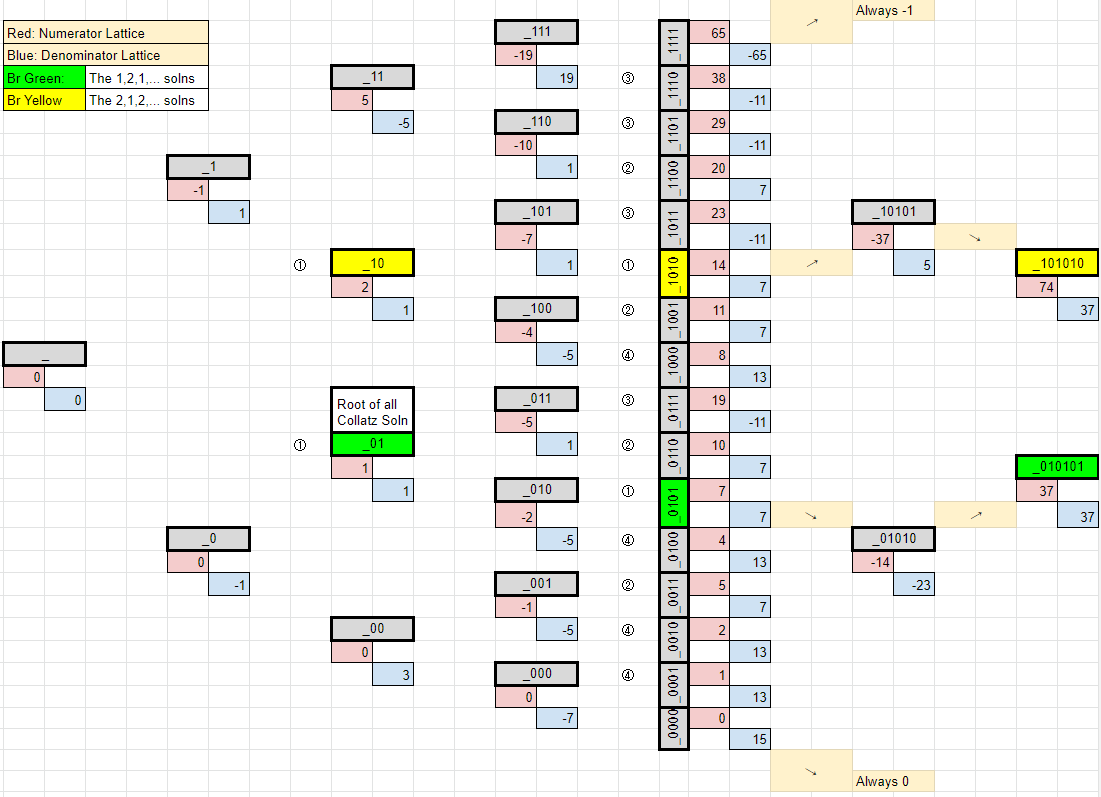

# Some Lattice Properties
  1. Two distinct operators named Up and Dn exist for both the denominator and the numerator
  2. Both denominator operators have no off-diagonal elements and are commutative
  3. The Dn numerator operator has no off-diagonal elements and is commutative
  4. The Up numerator operator has an off-diagonal element
  5. The off-diagonal value of the Up numerator operator accumulates
  6. The Dn operator clears the off-diagonal value of the Up operator
  7. The reverse operator for Dn for both denominator and numerator is trivially the inverse. 
  8. Walking from bottom to top (0 to -1) of the values of a given rank can be done since the Dn operator is easy to reverse and the values associated with the bottom parameters of any given rank depend only on the rank.
  9. Because the denominator is fully commutative, the value of a denominator only depends on the number of 1's and 0's in its label.
  10. The value of a numerator, in part, depends on the count of the number of ones at the end of its label SINCE the most recent 0.
  11. The known 1,2,1... and 2,1,2,1 solutions coincide with denominators that follow the A005061 sequence $ 4^n - 3^n $ in the odd generations which can be derived from odd-ranked matrices
  12. The 1,2,1,... and 2,1,2,.. solutions lie at a "constant position" in the lattice: 0,{set 1},1_soln,{set 2},2_soln,{set 3},-1  where the in-between sets are all size (2^{rank-1} -2)/3.
  13. The upper \_111... numerator values are the sequence $ (-1)^{n}( 3^{n} - 2^{n} ) $ which is $ (-1)^{n} × OEIS\ sequence \ A001047 $ and the demoninators are $ -1\ \cdot numerator $
  14. The lower \_000... denominator values are $ (-1)^{n}(2^{n} - 1) $ and the numerators are always 0.
  15. The sum of the denominators of the odd generations = 0
  16. There are interesting patterns in the sums of the numerators and denominators in general.  Note that for odd lengthed cycles from the even ranked matrix solutions that is not until rank 10 that the magnitude of the sum of the numerators (odd ranks) gets larger than the sum of the denominators (even ranks).  At first glance that is an important inflection point, fortunately it does not come after our ability to exhaustively solve.

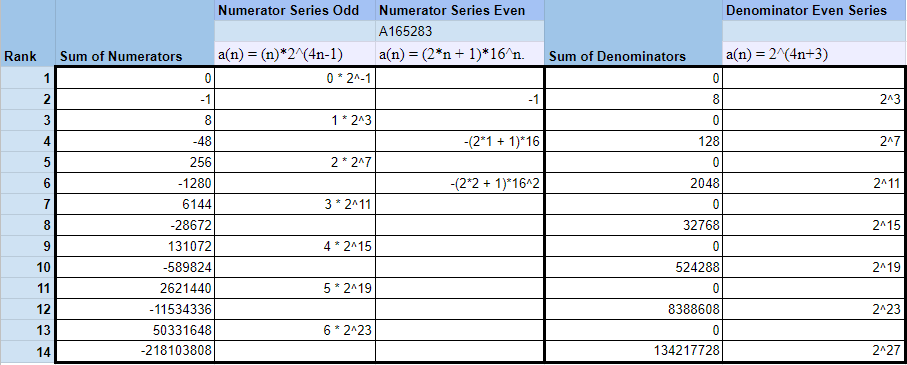

# Solution Observations

## All values associated with a cycle will be present in the lattice in the same generation

We see this with the 1,2,1,... cycle.  The reason is that even though the lattice is comprised of just the "first" value of each solution, each generation will contain all permutations of the arrangement of the generator matrices which will include the rearrangements of a given solution.

This means that the **first** time that a new long all-integer cycle (that does not include 1 or 2) appears THEN $\ rank-1\ $ **of** $ 2^{rank-1 } $ lattice values of the solution will belong to the new cycle solution.  

This requirement that all associated integers appear whole-cloth also seems to reduce the likelihood of a higher order solution.

## All cycles will repeat infinitely on their cycle length

We see this with the 1,2,1,... cycle which we see at ranks 3,5,7,9,

Odd cycles therefore alternate between even and odd ranks while even cycles stay on odd ranks.  There can be no even cycles on even ranks.

## Solutions start at rank=3

Even though the lattice generators are nicely consistent starting from the rank 1 single-valued matrices, there are no Collatz cycles until the rank 3 matrices.


## Solutions come in sets

For instance in the 1,2 case, \_01 and \_10 form a solution set of size 2 as they are mutually invariant under rotation of their binary label.  In general, rotations of the label digits are related solutions.  For instance these solutions are the same cycle:  \_0011, \_1001, \_1100, \_0110.

If there are longer-cycle integer solutions, they must come in sets.

The denominator is the same across the solutions of a set because the number of 1's and 0's in the label does not change in a set and the denominator generator is commutative.

The OEIS sequence https://oeis.org/A000031  gives the numer of sets in a generation.  Set sizes (ignoring 0 bottom and -1 top singular values):

 - Odd ranks
     - rank 3:   1×size(2)  
     - rank 5:   1×size(2), 3×size(4)
     - rank 7:   1×size(2), 2×size(3),  9×size(6)
     - rank 9:   1×size(2), 3×size(4),  30×size(8)
     - rank 11:  1×size(2), 6×size(5), 99×size(10)
     - rank 13:  1×size(2), 2×size(3),  3×size(4), 9×size(6), 335×size(12)
 - Even ranks
     - rank 4: 2×size(3)  
     - rank 6: 6×size(5)
     - rank 8: 18×size(7)
     - rank 10: 2×size(3) + 56×size(9)
     - rank 12: 186×size(11)
     - rank 14: 630×size(13)

The restrictions on the composition of the above sets comes from the limitations of rotating binary vectors, not algebra.

The solutions that we care about must come in set sizes of $ rank-1 $ (which appears to always be possible)

All sets that are not the _00... or _11... set must each have at least one member that satisfies each of the patterns:
  - \_...01
  - \_...10

There may be a proof by contradiction available due to the above since we can establish an algebraic relationship between these two members of a set.

## Odd Cycle Lengths cannot provide integer solutions

For lots of reasons including I think someone has already proven this with regards to convergence of $ \frac{3^n+1}{2} and \frac{n}{2} $ .  Cycles of odd length have to be able to cross from the Odd ranks to the Even ranks.  

In the above enumeration of possible set sizes we see two size 3 sets at rank 4 then at rank 7, 10 and 13.  These are labels \_001 and \_011. It is easily computed that these solutions are non-integral.

☐ TODO: Verify the following on large ranks > 14

 - Solutions of odd cycles with more 0's than 1's have positive elements with values pinched between 0 and 1
 
 - Solutions of odd cycles with more 1's than 0's have negative elements
   - On Odd ranks, they have positive numerators with negative denominators
   - On Even ranks, they have negative numerators with positive denominators

Why is a balance of Up,Dn required to get an integer? (or all Up, all Dn)

## Solutions have contraints based on the mathematics of counting invariance under rotation of binary vectors

This is a simple consequence of the set finding above.

https://oeis.org/A000031
 - Number of n-bead necklaces with 2 colors when turning over is not allowed
 - Number of output sequences from a simple n-stage cycling shift register
 - Number of binary irreducible polynomials whose degree divides n
 - (1/n) * Dirichlet convolution of phi(n) and 2^n, n>0 
 - Jianing Song shows that a(n) is even for n!={0,2} ... the # of sets, not the content of the sets

## Numerators must be same sign
In order for a solution to be a Collatz solution, the numerators of a solution cycle must all be same sign and be the same as the denominator

 - We may be able to find limits on the ratio of 1's and 0's in a solution set related to this

## max(set) - min(set) >= set_size * denominator
In order for there to be set_size distinct solutions that are integers, they have to at least be spaced far enough apart that we can have that set_size integers.

 - We may also be able to find limits on the ratio of 1's and 0's in a solution set related to this
 

## Hypothesis regarding solution common ancestors

The common ancestor of an integral solution collection must be an integer node where the numerator is evenly divisible by the denominator.  

For instance, for the 1,2,1,... family, the common ancestor of the first 1,2 node pair at rank 3 is the first node of the lattice labeled "1" which has the value 0/2.  The top, bottom and the 1,2,1... solutions all then provide possible common ancestors for additional solutions.

So there has to be some ancestral 0,1,2,-1 value that contains the new cycle.  Though sparse, these are infinite in the lattice.

This would mean that all higher order cycles have to have a length that is a power of 2.

My intuition is telling me that this requirement would then put severe limits on the size of new cycles that could be introduced ... but I am not seeing the math.  I think then we might find that it is required that pairs of nodes from the new solution must also be cycles themselves since they will have a common ancestor closer than the set as a whole.  And we know that is not possible, the only 2-cycle possible is 1,2,1,...



In [1]:
99*10 + 6*6 + 2 + 2

1030

In [2]:
((2**7) - 2 )/7

18.0

In [3]:
from functools import reduce
import io
import itertools
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
from scipy.optimize import nnls
from sklearn import linear_model
from sympy.functions.special import tensor_functions
import sys

pd.set_option('display.max_rows', None)

In [4]:
def factors(n):    
    return set(reduce(list.__add__, 
                ([i, n//i] for i in range(1, int(n**0.5) + 1) if n % i == 0)))

In [5]:
def showInner(A, B):
    rows = []
    for i in range(A.shape[0]):
        row = ["0"]*A.shape[1]
        for j in range(A.shape[1]):
            if A[i][j] != 0 and B[j][i] != 0:
                row[j] = ("(%s * %s)"%(str(A[i][j]), str(B[j][i])))
        rows.append(row)
    return rows

In [6]:
showInner(np.array([[100,101],[110,111]]), np.array([[200,201],[210,211]]).T)

[['(100 * 200)', '(101 * 201)'], ['(110 * 210)', '(111 * 211)']]

In [7]:
def testMatAssign():
    A2 = np.array([[-3,2],[1,-1]])
    A3 = np.zeros((3,3))
    A3[1:,1:] = A2
    return A3
#
testMatAssign()

array([[ 0.,  0.,  0.],
       [ 0., -3.,  2.],
       [ 0.,  1., -1.]])

In [8]:
def testOverwriteColumn():
    A2 = np.array([[-3,2],[1,-1]])
    V = np.array([7,8])
    A2.T[0] = V
    return A2
#
testOverwriteColumn()

array([[ 7,  2],
       [ 8, -1]])

In [9]:
def testExpandRet():
    return 2, 3

def testExpandRet2():
    L = [1]
    return L + [ *testExpandRet() ]

testExpandRet2()

[1, 2, 3]

In [232]:
class CycleCase:
    def __init__(self, rank, idx, label, parent_label, final, soln, y, mat):
        self.rank = rank
        self.idx = idx
        self.label = label
        self.parent_label = parent_label
        self.final = final
        self.soln = soln
        self.y = y
        self.mat = mat
    #
# 

def cycleCase__1():
    return CycleCase(2, 1, "_1", "1", (-1, 1), np.array([-1, -1]), np.array([1,0]), np.array([[-3,2],[1,-1]]))

def cycleCase__0():
    return CycleCase(2, 0, "_0", "0", (0, 1), np.array([0, 0]), np.array([0,0]), np.array([[-1,2],[1,-1]]))

cycle_cases = [[cycleCase__1(),cycleCase__0()]]

list(map(vars, cycle_cases[0]))

[{'rank': 2,
  'idx': 1,
  'label': '_1',
  'parent_label': '1',
  'final': (-1, 1),
  'soln': array([-1, -1]),
  'y': array([1, 0]),
  'mat': array([[-3,  2],
         [ 1, -1]])},
 {'rank': 2,
  'idx': 0,
  'label': '_0',
  'parent_label': '0',
  'final': (0, 1),
  'soln': array([0, 0]),
  'y': array([0, 0]),
  'mat': array([[-1,  2],
         [ 1, -1]])}]

In [233]:
def closest_int(f):
    if 0.0 <= f:
        return int(f + 0.49999999999999999999999999999999999)
    else:
        return int(f - 0.50000000000000000000000000000000000)


In [234]:
def next_Y_Mat(rank, prev_y, prev_mat, y_0):
    mat = np.zeros((rank, rank))
    mat[1:,1:] = prev_mat
    y = np.zeros((rank))

    mat[0,1] = 2
    mat[rank-1, 1] = 0
    mat[rank-1, 0] = 1
    y[1:] = prev_y
    y[0] = y_0

    if y_0 == 1:
        mat[0,0] = -3
    else:
        mat[0,0] = -1

    return y, mat
#
    


def casesNext(casesPrev):
    cases = []
    
    rank_prev = casesPrev[0].rank
    rank = rank_prev + 1
    idx = (2^rank_prev) - 1
    
    for prevCase in casesPrev:
        # y_0 = 1
        y, mat = next_Y_Mat(rank, prevCase.y, prevCase.mat, 1)
        x = np.linalg.solve(mat, y)
        det = np.linalg.det(mat)                
        cases.append(CycleCase(
            rank, 
            idx, 
            prevCase.label + "1",
            prevCase.label,
            (closest_int(x[-1]*det), closest_int(det)),
            x,
            y,
            mat
            ))
        
        idx = idx -1
        
        # y_0 = 0
        y, mat = next_Y_Mat(rank, prevCase.y, prevCase.mat, 0)
        x = np.linalg.solve(mat, y)
        det = np.linalg.det(mat)
        cases.append(CycleCase(
            rank, 
            idx, 
            prevCase.label + "0",
            prevCase.label,
            (closest_int(x[-1]*det), closest_int(det)),
            x,
            y,
            mat
            ))
        
        idx = idx -1
    #
    return cases
#

In [235]:
list(map(vars, casesNext([cycleCase__1(),cycleCase__0()])))

[{'rank': 3,
  'idx': -1,
  'label': '_11',
  'parent_label': '_1',
  'final': (5, -5),
  'soln': array([-1., -1., -1.]),
  'y': array([1., 1., 0.]),
  'mat': array([[-3.,  2.,  0.],
         [ 0., -3.,  2.],
         [ 1.,  0., -1.]])},
 {'rank': 3,
  'idx': -2,
  'label': '_10',
  'parent_label': '_1',
  'final': (2, 1),
  'soln': array([2., 1., 2.]),
  'y': array([0., 1., 0.]),
  'mat': array([[-1.,  2.,  0.],
         [ 0., -3.,  2.],
         [ 1.,  0., -1.]])},
 {'rank': 3,
  'idx': -3,
  'label': '_01',
  'parent_label': '_0',
  'final': (1, 1),
  'soln': array([1., 2., 1.]),
  'y': array([1., 0., 0.]),
  'mat': array([[-3.,  2.,  0.],
         [ 0., -1.,  2.],
         [ 1.,  0., -1.]])},
 {'rank': 3,
  'idx': -4,
  'label': '_00',
  'parent_label': '_0',
  'final': (0, 3),
  'soln': array([-0.,  0.,  0.]),
  'y': array([0., 0., 0.]),
  'mat': array([[-1.,  2.,  0.],
         [ 0., -1.,  2.],
         [ 1.,  0., -1.]])}]

In [236]:
list(map(vars, casesNext(casesNext([cycleCase__1(),cycleCase__0()]))))

[{'rank': 4,
  'idx': 0,
  'label': '_111',
  'parent_label': '_11',
  'final': (-19, 19),
  'soln': array([-1., -1., -1., -1.]),
  'y': array([1., 1., 1., 0.]),
  'mat': array([[-3.,  2.,  0.,  0.],
         [ 0., -3.,  2.,  0.],
         [ 0.,  0., -3.,  2.],
         [ 1.,  0.,  0., -1.]])},
 {'rank': 4,
  'idx': -1,
  'label': '_110',
  'parent_label': '_11',
  'final': (-10, 1),
  'soln': array([-10.,  -5.,  -7., -10.]),
  'y': array([0., 1., 1., 0.]),
  'mat': array([[-1.,  2.,  0.,  0.],
         [ 0., -3.,  2.,  0.],
         [ 0.,  0., -3.,  2.],
         [ 1.,  0.,  0., -1.]])},
 {'rank': 4,
  'idx': -2,
  'label': '_101',
  'parent_label': '_10',
  'final': (-7, 1),
  'soln': array([ -7., -10.,  -5.,  -7.]),
  'y': array([1., 0., 1., 0.]),
  'mat': array([[-3.,  2.,  0.,  0.],
         [ 0., -1.,  2.,  0.],
         [ 0.,  0., -3.,  2.],
         [ 1.,  0.,  0., -1.]])},
 {'rank': 4,
  'idx': -3,
  'label': '_100',
  'parent_label': '_10',
  'final': (-4, -5),
  'soln': arra

In [237]:
list(map(vars, casesNext(casesNext(casesNext([cycleCase__1(),cycleCase__0()])))))

[{'rank': 5,
  'idx': 5,
  'label': '_1111',
  'parent_label': '_111',
  'final': (65, -65),
  'soln': array([-1., -1., -1., -1., -1.]),
  'y': array([1., 1., 1., 1., 0.]),
  'mat': array([[-3.,  2.,  0.,  0.,  0.],
         [ 0., -3.,  2.,  0.,  0.],
         [ 0.,  0., -3.,  2.,  0.],
         [ 0.,  0.,  0., -3.,  2.],
         [ 1.,  0.,  0.,  0., -1.]])},
 {'rank': 5,
  'idx': 4,
  'label': '_1110',
  'parent_label': '_111',
  'final': (38, -11),
  'soln': array([-3.45454545, -1.72727273, -2.09090909, -2.63636364, -3.45454545]),
  'y': array([0., 1., 1., 1., 0.]),
  'mat': array([[-1.,  2.,  0.,  0.,  0.],
         [ 0., -3.,  2.,  0.,  0.],
         [ 0.,  0., -3.,  2.,  0.],
         [ 0.,  0.,  0., -3.,  2.],
         [ 1.,  0.,  0.,  0., -1.]])},
 {'rank': 5,
  'idx': 3,
  'label': '_1101',
  'parent_label': '_110',
  'final': (29, -11),
  'soln': array([-2.63636364, -3.45454545, -1.72727273, -2.09090909, -2.63636364]),
  'y': array([1., 0., 1., 1., 0.]),
  'mat': array([[-3.,

In [238]:
np.linalg.det(np.array([[1,0,-1],[-3,2,0],[0,-3,2]]))

-5.000000000000001

In [239]:
M = np.zeros((3,3))


In [240]:
M.shape

(3, 3)

In [241]:
M.shape[1]

3

In [242]:
for p in itertools.permutations(list(range(3))):
    print("%s => %d"%(str(p), tensor_functions.eval_levicivita(*p)))


(0, 1, 2) => 1
(0, 2, 1) => -1
(1, 0, 2) => -1
(1, 2, 0) => 1
(2, 0, 1) => 1
(2, 1, 0) => -1


In [243]:
def matrixIndexVals(M, indexes):
    rank = M.shape[1]
    v = np.zeros(rank)
    row = 0
    for idx in indexes:
        v[row] = M[row, idx]
        row = row +1
    return v
#
def determinantParts(M):
    parts = []
    rank = M.shape[1]
    for p in itertools.permutations(list(range(rank))):
        sign = tensor_functions.eval_levicivita(*p)
        t = (sign, *matrixIndexVals(M, p))
        if abs(math.prod(t))> 0.000001:
            parts.append(t)
    return parts
#
def printDeterminantParts(M):
    print(determinantParts(M))

In [244]:
printDeterminantParts(np.array([[-3.,  2.,  0.,  0.,  0.],
         [ 0., -1.,  2.,  0.,  0.],
         [ 0.,  0., -1.,  2.,  0.],
         [ 0.,  0.,  0., -3.,  2.],
         [ 1.,  0.,  0.,  0., -1.]]))

[(1, -3.0, -1.0, -1.0, -3.0, -1.0), (1, 2.0, 2.0, 2.0, 2.0, 1.0)]


# Adding determinant parts to CycleCases

In [245]:
class CycleCase:
    def __init__(self, rank, idx, label, parent_label, final, soln, y, mat, numer_parts, denom_parts):
        self.rank = rank
        self.idx = idx
        self.label = label
        self.parent_label = parent_label
        self.final = final
        self.soln = soln
        self.y = y
        self.mat = mat
        self.numer_parts = numer_parts
        self.denom_parts = denom_parts
    #
# 


In [246]:
def cycleCase__1():
    return CycleCase(2, 1, "_1", "1", (-1, 1), np.array([-1, -1])
                     , np.array([1,0]), np.array([[-3,2],[1,-1]])
                     , [(1, 1, -1)], [(1, -3, -1),(-1, 2, 1)]
                    )

def cycleCase__0():
    return CycleCase(2, 0, "_0", "0", (0, 1), np.array([0, 0])
                     , np.array([0,0]), np.array([[-1,2],[1,-1]])
                     ,  [], [(1, -1, -1),(-1, 2, 1)]
                    )

cycle_cases = [[cycleCase__1(),cycleCase__0()]]

list(map(vars, cycle_cases[0]))

[{'rank': 2,
  'idx': 1,
  'label': '_1',
  'parent_label': '1',
  'final': (-1, 1),
  'soln': array([-1, -1]),
  'y': array([1, 0]),
  'mat': array([[-3,  2],
         [ 1, -1]]),
  'numer_parts': [(1, 1, -1)],
  'denom_parts': [(1, -3, -1), (-1, 2, 1)]},
 {'rank': 2,
  'idx': 0,
  'label': '_0',
  'parent_label': '0',
  'final': (0, 1),
  'soln': array([0, 0]),
  'y': array([0, 0]),
  'mat': array([[-1,  2],
         [ 1, -1]]),
  'numer_parts': [],
  'denom_parts': [(1, -1, -1), (-1, 2, 1)]}]

In [247]:
def numerMatrix(mat, y, column):
    mat_c = mat.copy()
    mat_c.T[column] = y
    return mat_c

def casesNext(casesPrev):
    cases = []
    
    rank_prev = casesPrev[0].rank
    rank = rank_prev + 1
    idx = (2**rank_prev) - 1
    
    for prevCase in casesPrev:
        # y_0 = 1
        y, mat = next_Y_Mat(rank, prevCase.y, prevCase.mat, 1)
        x = np.linalg.solve(mat, y)
        det = np.linalg.det(mat)
        D_parts = determinantParts(mat)
        D0_parts = determinantParts(numerMatrix(mat, y, 0))
        cases.append(CycleCase(
            rank, 
            idx, 
            prevCase.label + "1",
            prevCase.label,
            (closest_int(x[-1]*det), closest_int(det)),
            x,
            y,
            mat,
            D0_parts,
            D_parts
            ))
        
        idx = idx -1
        
        # y_0 = 0
        y, mat = next_Y_Mat(rank, prevCase.y, prevCase.mat, 0)
        x = np.linalg.solve(mat, y)
        det = np.linalg.det(mat)
        D_parts = determinantParts(mat)
        D0_parts = determinantParts(numerMatrix(mat, y, 0))
        cases.append(CycleCase(
            rank, 
            idx, 
            prevCase.label + "0",
            prevCase.label,
            (closest_int(x[-1]*det), closest_int(det)),
            x,
            y,
            mat,
            D0_parts,
            D_parts
            ))
        
        idx = idx -1
    #
    return cases
#

# The Collatz Root
The integer solution below:

```
{'rank': 3,
  'idx': 1,
  'label': '101',
  'parent_label': '10',
  'final': (1, 1),
  'soln': array([1., 2., 1.]),
  'y': array([1., 0., 0.]),
  'mat': array([[-3.,  2.,  0.],
         [ 0., -1.,  2.],
         [ 1.,  0., -1.]]),
  'numer_parts': [(1, 1.0, -1.0, -1.0)],
  'denom_parts': [(1, -3.0, -1.0, -1.0), (1, 2.0, 2.0, 1.0)]}
```
  
Is the root cycle of the actual Collatz problem.

Also note the degenerate solution: 
```
 {'rank': 3,
  'idx': 2,
  'label': '110',
  'parent_label': '11',
  'final': (2, 1),
  'soln': array([2., 1., 2.]),
  'y': array([0., 1., 0.]),
  'mat': array([[-1.,  2.,  0.],
         [ 0., -3.,  2.],
         [ 1.,  0., -1.]]),
  'numer_parts': [(-1, 2.0, 1.0, -1.0)],
  'denom_parts': [(1, -1.0, -3.0, -1.0), (1, 2.0, 2.0, 1.0)]}
```
  

In [248]:
list(map(vars, casesNext([cycleCase__1(),cycleCase__0()])))

[{'rank': 3,
  'idx': 3,
  'label': '_11',
  'parent_label': '_1',
  'final': (5, -5),
  'soln': array([-1., -1., -1.]),
  'y': array([1., 1., 0.]),
  'mat': array([[-3.,  2.,  0.],
         [ 0., -3.,  2.],
         [ 1.,  0., -1.]]),
  'numer_parts': [(1, 1.0, -3.0, -1.0), (-1, 2.0, 1.0, -1.0)],
  'denom_parts': [(1, -3.0, -3.0, -1.0), (1, 2.0, 2.0, 1.0)]},
 {'rank': 3,
  'idx': 2,
  'label': '_10',
  'parent_label': '_1',
  'final': (2, 1),
  'soln': array([2., 1., 2.]),
  'y': array([0., 1., 0.]),
  'mat': array([[-1.,  2.,  0.],
         [ 0., -3.,  2.],
         [ 1.,  0., -1.]]),
  'numer_parts': [(-1, 2.0, 1.0, -1.0)],
  'denom_parts': [(1, -1.0, -3.0, -1.0), (1, 2.0, 2.0, 1.0)]},
 {'rank': 3,
  'idx': 1,
  'label': '_01',
  'parent_label': '_0',
  'final': (1, 1),
  'soln': array([1., 2., 1.]),
  'y': array([1., 0., 0.]),
  'mat': array([[-3.,  2.,  0.],
         [ 0., -1.,  2.],
         [ 1.,  0., -1.]]),
  'numer_parts': [(1, 1.0, -1.0, -1.0)],
  'denom_parts': [(1, -3.0, -

In [249]:
list(map(vars, casesNext(casesNext([cycleCase__1(),cycleCase__0()]))))

[{'rank': 4,
  'idx': 7,
  'label': '_111',
  'parent_label': '_11',
  'final': (-19, 19),
  'soln': array([-1., -1., -1., -1.]),
  'y': array([1., 1., 1., 0.]),
  'mat': array([[-3.,  2.,  0.,  0.],
         [ 0., -3.,  2.,  0.],
         [ 0.,  0., -3.,  2.],
         [ 1.,  0.,  0., -1.]]),
  'numer_parts': [(1, 1.0, -3.0, -3.0, -1.0),
   (-1, 2.0, 1.0, -3.0, -1.0),
   (1, 2.0, 2.0, 1.0, -1.0)],
  'denom_parts': [(1, -3.0, -3.0, -3.0, -1.0), (-1, 2.0, 2.0, 2.0, 1.0)]},
 {'rank': 4,
  'idx': 6,
  'label': '_110',
  'parent_label': '_11',
  'final': (-10, 1),
  'soln': array([-10.,  -5.,  -7., -10.]),
  'y': array([0., 1., 1., 0.]),
  'mat': array([[-1.,  2.,  0.,  0.],
         [ 0., -3.,  2.,  0.],
         [ 0.,  0., -3.,  2.],
         [ 1.,  0.,  0., -1.]]),
  'numer_parts': [(-1, 2.0, 1.0, -3.0, -1.0), (1, 2.0, 2.0, 1.0, -1.0)],
  'denom_parts': [(1, -1.0, -3.0, -3.0, -1.0), (-1, 2.0, 2.0, 2.0, 1.0)]},
 {'rank': 4,
  'idx': 5,
  'label': '_101',
  'parent_label': '_10',
  'final

In [250]:
list(map(vars, casesNext(casesNext(casesNext([cycleCase__1(),cycleCase__0()])))))

[{'rank': 5,
  'idx': 15,
  'label': '_1111',
  'parent_label': '_111',
  'final': (65, -65),
  'soln': array([-1., -1., -1., -1., -1.]),
  'y': array([1., 1., 1., 1., 0.]),
  'mat': array([[-3.,  2.,  0.,  0.,  0.],
         [ 0., -3.,  2.,  0.,  0.],
         [ 0.,  0., -3.,  2.,  0.],
         [ 0.,  0.,  0., -3.,  2.],
         [ 1.,  0.,  0.,  0., -1.]]),
  'numer_parts': [(1, 1.0, -3.0, -3.0, -3.0, -1.0),
   (-1, 2.0, 1.0, -3.0, -3.0, -1.0),
   (1, 2.0, 2.0, 1.0, -3.0, -1.0),
   (-1, 2.0, 2.0, 2.0, 1.0, -1.0)],
  'denom_parts': [(1, -3.0, -3.0, -3.0, -3.0, -1.0),
   (1, 2.0, 2.0, 2.0, 2.0, 1.0)]},
 {'rank': 5,
  'idx': 14,
  'label': '_1110',
  'parent_label': '_111',
  'final': (38, -11),
  'soln': array([-3.45454545, -1.72727273, -2.09090909, -2.63636364, -3.45454545]),
  'y': array([0., 1., 1., 1., 0.]),
  'mat': array([[-1.,  2.,  0.,  0.,  0.],
         [ 0., -3.,  2.,  0.,  0.],
         [ 0.,  0., -3.,  2.,  0.],
         [ 0.,  0.,  0., -3.,  2.],
         [ 1.,  0.,  0.,

# Denominator Generator Found
This recursive function gives the next generation of denominators for a current generation's denominators.

The denominator only requires 2 factors named "a" and "b" below.  The sum of these two factors is the denominator of the matrix solution.

In [251]:
a_b_1 = [((-1,1), -2)]
def a_b_next(tup_list):
    r = []
    for t in tup_list:
        a = t[0][0]
        b = t[0][1]

        a_up = -3 * a
        b_up = -2 * b
        r.append(((a_up, b_up), a_up + b_up))
        
        a_dn = -1 * a
        b_dn = -2 * b
        r.append(((a_dn, b_dn), a_dn + b_dn))
    #
    return r
#
        

In [252]:
a_b_next(a_b_1)

[((3, -2), 1), ((1, -2), -1)]

In [253]:
a_b_next(a_b_next(a_b_1))

[((-9, 4), -5), ((-3, 4), 1), ((-3, 4), 1), ((-1, 4), 3)]

In [254]:
a_b_next(a_b_next(a_b_next(a_b_1)))

[((27, -8), 19),
 ((9, -8), 1),
 ((9, -8), 1),
 ((3, -8), -5),
 ((9, -8), 1),
 ((3, -8), -5),
 ((3, -8), -5),
 ((1, -8), -7)]

In [255]:
a_b_3 = [((-9,4),5), ((-3, 4), 1), ((-3, 4), 1), ((-1, 4), 3)]
a_b_next(a_b_3)


[((27, -8), 19),
 ((9, -8), 1),
 ((9, -8), 1),
 ((3, -8), -5),
 ((9, -8), 1),
 ((3, -8), -5),
 ((3, -8), -5),
 ((1, -8), -7)]

In [256]:
list(map(vars, casesNext(casesNext(casesNext(casesNext([cycleCase__1(),cycleCase__0()]))))))

[{'rank': 6,
  'idx': 31,
  'label': '_11111',
  'parent_label': '_1111',
  'final': (-211, 211),
  'soln': array([-1., -1., -1., -1., -1., -1.]),
  'y': array([1., 1., 1., 1., 1., 0.]),
  'mat': array([[-3.,  2.,  0.,  0.,  0.,  0.],
         [ 0., -3.,  2.,  0.,  0.,  0.],
         [ 0.,  0., -3.,  2.,  0.,  0.],
         [ 0.,  0.,  0., -3.,  2.,  0.],
         [ 0.,  0.,  0.,  0., -3.,  2.],
         [ 1.,  0.,  0.,  0.,  0., -1.]]),
  'numer_parts': [(1, 1.0, -3.0, -3.0, -3.0, -3.0, -1.0),
   (-1, 2.0, 1.0, -3.0, -3.0, -3.0, -1.0),
   (1, 2.0, 2.0, 1.0, -3.0, -3.0, -1.0),
   (-1, 2.0, 2.0, 2.0, 1.0, -3.0, -1.0),
   (1, 2.0, 2.0, 2.0, 2.0, 1.0, -1.0)],
  'denom_parts': [(1, -3.0, -3.0, -3.0, -3.0, -3.0, -1.0),
   (-1, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0)]},
 {'rank': 6,
  'idx': 30,
  'label': '_11110',
  'parent_label': '_1111',
  'final': (-130, 49),
  'soln': array([-2.65306122, -1.32653061, -1.48979592, -1.73469388, -2.10204082,
         -2.65306122]),
  'y': array([0., 1., 1., 1., 1.

# Numerator Generator Found
This recursive funtion give the next generation of numerators for a given generation.

Next step: combine the denominator and numerator generators into a single sequence.

In [257]:
d_t_1 = [(0,-1)]
def d_t_next(tup_list):
    r = []
    for tup in tup_list:
        numer = tup[0]
        t = tup[1]
        
        numer_up =  ((-2)*numer) + t
        t_up = -3 * t
        r.append((numer_up, t_up))

        numer_dn = (-2)*numer
        t_dn = -1 * t
        r.append((numer_dn, t_dn))
    #
    return r
#

In [258]:
d_t_2 = d_t_next(d_t_1)
d_t_2

[(-1, 3), (0, 1)]

In [259]:
(-2*5) - ((-3) ** 2)

-19

In [260]:
(-3 ** 2)

-9

In [261]:
d_t_next(d_t_next(d_t_1))

[(5, -9), (2, -3), (1, -3), (0, -1)]

In [262]:
d_t_next(d_t_2)

[(5, -9), (2, -3), (1, -3), (0, -1)]

In [263]:
d_t_next(d_t_next(d_t_2))

[(-19, 27), (-10, 9), (-7, 9), (-4, 3), (-5, 9), (-2, 3), (-1, 3), (0, 1)]

In [264]:
d_t_next(d_t_next(d_t_next(d_t_2)))

[(65, -81),
 (38, -27),
 (29, -27),
 (20, -9),
 (23, -27),
 (14, -9),
 (11, -9),
 (8, -3),
 (19, -27),
 (10, -9),
 (7, -9),
 (4, -3),
 (5, -9),
 (2, -3),
 (1, -3),
 (0, -1)]

In [265]:
d_t_next(d_t_next(d_t_next(d_t_next(d_t_2))))

[(-211, 243),
 (-130, 81),
 (-103, 81),
 (-76, 27),
 (-85, 81),
 (-58, 27),
 (-49, 27),
 (-40, 9),
 (-73, 81),
 (-46, 27),
 (-37, 27),
 (-28, 9),
 (-31, 27),
 (-22, 9),
 (-19, 9),
 (-16, 3),
 (-65, 81),
 (-38, 27),
 (-29, 27),
 (-20, 9),
 (-23, 27),
 (-14, 9),
 (-11, 9),
 (-8, 3),
 (-19, 27),
 (-10, 9),
 (-7, 9),
 (-4, 3),
 (-5, 9),
 (-2, 3),
 (-1, 3),
 (0, 1)]

In [266]:
d_t_next(d_t_next(d_t_next(d_t_next(d_t_next(d_t_2)))))

[(665, -729),
 (422, -243),
 (341, -243),
 (260, -81),
 (287, -243),
 (206, -81),
 (179, -81),
 (152, -27),
 (251, -243),
 (170, -81),
 (143, -81),
 (116, -27),
 (125, -81),
 (98, -27),
 (89, -27),
 (80, -9),
 (227, -243),
 (146, -81),
 (119, -81),
 (92, -27),
 (101, -81),
 (74, -27),
 (65, -27),
 (56, -9),
 (89, -81),
 (62, -27),
 (53, -27),
 (44, -9),
 (47, -27),
 (38, -9),
 (35, -9),
 (32, -3),
 (211, -243),
 (130, -81),
 (103, -81),
 (76, -27),
 (85, -81),
 (58, -27),
 (49, -27),
 (40, -9),
 (73, -81),
 (46, -27),
 (37, -27),
 (28, -9),
 (31, -27),
 (22, -9),
 (19, -9),
 (16, -3),
 (65, -81),
 (38, -27),
 (29, -27),
 (20, -9),
 (23, -27),
 (14, -9),
 (11, -9),
 (8, -3),
 (19, -27),
 (10, -9),
 (7, -9),
 (4, -3),
 (5, -9),
 (2, -3),
 (1, -3),
 (0, -1)]

# The 1,2,1,2,1... Solutions

Every odd dimension is going to have a 1,2,1,2,1 solution at the edge of the 3rd quartile of solutions.  

This solution is like a boat anchor on any other solution.

With the generator, can we navigate the lattice and show that there are no integer solutions in the same dimension that has a 1,2,1,2,1 solution?

The up,down,up,down,... solutions in the lattice have odd-ranked matrices that look like:

```
        [[-3.,  2.,  0.],
         [ 0., -1.,  2.],
         [ 1.,  0., -1.]]
```
#### ,
```
        [[-3.,  2.,  0.,  0.,  0.],
         [ 0., -1.,  2.,  0.,  0.],
         [ 0.,  0., -3.,  2.,  0.],
         [ 0.,  0.,  0., -1.,  2.],
         [ 1.,  0.,  0.,  0., -1.]]
```
#### ⋮
and always provide the 1,2,1,2,1... cycle

The numerator and denominator sequence is 1,7,37,175,... which is the OEIS sequence https://oeis.org/A005061 even though the solutions of the even rank matrices are different for the numerator and denominator.  For these cycles, the numberator and denominator values repeatedly converge on odd ranked matrices for even cycles and diverge on even ranked matrices for odd cycles.

$a(n) = 4^n - 3^n$


In [273]:
def caseNext(prevCase, y_0):
    rank_prev = prevCase.rank
    rank = rank_prev + 1
    y, mat = next_Y_Mat(rank, prevCase.y, prevCase.mat, y_0)    
    x = np.linalg.solve(mat, y)
    det = np.linalg.det(mat)
    D_parts = determinantParts(mat)
    D0_parts = determinantParts(numerMatrix(mat, y, 0))
    
    label = prevCase.label + str(y_0)
    
    return CycleCase(
            rank, 
            int(label[1:], 2), 
            label,
            prevCase.label,
            (closest_int(x[-1]*det), closest_int(det)),
            x,
            y,
            mat,
            D0_parts,
            D_parts
            )
#
def caseUp(casePrev):
    return caseNext(casePrev, 1)
#
def caseDn(casePrev):
    return caseNext(casePrev, 0)
#


In [274]:
cycleCase_101 = caseUp(cycleCase__0())
vars(cycleCase_101)

{'rank': 3,
 'idx': 1,
 'label': '_01',
 'parent_label': '_0',
 'final': (1, 1),
 'soln': array([1., 2., 1.]),
 'y': array([1., 0., 0.]),
 'mat': array([[-3.,  2.,  0.],
        [ 0., -1.,  2.],
        [ 1.,  0., -1.]]),
 'numer_parts': [(1, 1.0, -1.0, -1.0)],
 'denom_parts': [(1, -3.0, -1.0, -1.0), (1, 2.0, 2.0, 1.0)]}

In [275]:
cycleCase_10101 = caseUp(caseDn(cycleCase_101))
vars(cycleCase_10101)

{'rank': 5,
 'idx': 5,
 'label': '_0101',
 'parent_label': '_010',
 'final': (7, 7),
 'soln': array([1., 2., 1., 2., 1.]),
 'y': array([1., 0., 1., 0., 0.]),
 'mat': array([[-3.,  2.,  0.,  0.,  0.],
        [ 0., -1.,  2.,  0.,  0.],
        [ 0.,  0., -3.,  2.,  0.],
        [ 0.,  0.,  0., -1.,  2.],
        [ 1.,  0.,  0.,  0., -1.]]),
 'numer_parts': [(1, 1.0, -1.0, -3.0, -1.0, -1.0),
  (1, 2.0, 2.0, 1.0, -1.0, -1.0)],
 'denom_parts': [(1, -3.0, -1.0, -3.0, -1.0, -1.0),
  (1, 2.0, 2.0, 2.0, 2.0, 1.0)]}

In [276]:
cycleCase_1010101 = caseUp(caseDn(cycleCase_10101))
vars(cycleCase_1010101)

{'rank': 7,
 'idx': 21,
 'label': '_010101',
 'parent_label': '_01010',
 'final': (37, 37),
 'soln': array([1., 2., 1., 2., 1., 2., 1.]),
 'y': array([1., 0., 1., 0., 1., 0., 0.]),
 'mat': array([[-3.,  2.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -1.,  2.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -3.,  2.,  0.,  0.,  0.],
        [ 0.,  0.,  0., -1.,  2.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -3.,  2.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -1.,  2.],
        [ 1.,  0.,  0.,  0.,  0.,  0., -1.]]),
 'numer_parts': [(1, 1.0, -1.0, -3.0, -1.0, -3.0, -1.0, -1.0),
  (1, 2.0, 2.0, 1.0, -1.0, -3.0, -1.0, -1.0),
  (1, 2.0, 2.0, 2.0, 2.0, 1.0, -1.0, -1.0)],
 'denom_parts': [(1, -3.0, -1.0, -3.0, -1.0, -3.0, -1.0, -1.0),
  (1, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0)]}

In [277]:
cycleCase_101010101 = caseUp(caseDn(cycleCase_1010101))
vars(cycleCase_101010101)

{'rank': 9,
 'idx': 85,
 'label': '_01010101',
 'parent_label': '_0101010',
 'final': (175, 175),
 'soln': array([1., 2., 1., 2., 1., 2., 1., 2., 1.]),
 'y': array([1., 0., 1., 0., 1., 0., 1., 0., 0.]),
 'mat': array([[-3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -3.,  2.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0., -1.,  2.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -3.,  2.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -1.,  2.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -3.,  2.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.]]),
 'numer_parts': [(1, 1.0, -1.0, -3.0, -1.0, -3.0, -1.0, -3.0, -1.0, -1.0),
  (1, 2.0, 2.0, 1.0, -1.0, -3.0, -1.0, -3.0, -1.0, -1.0),
  (1, 2.0, 2.0, 2.0, 2.0, 1.0, -1.0, -3.0, -1.0, -1.0),
  (1, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, -1.0, -1.0)],
 'denom_parts': [(1, -3.0, -1.0, -3.0, -1.0, -3.0

# Limits of Permutations

This is about as far as we can go with using permutations to find the numerator and denominator parts ... execution time getting ubbearable.

# Combined Generator

Put the numerator and denominator generators together.
Tuple:  ((numerator, denominator), (a, b, t))

 - a: denominator "three" factor
 - b: denominator "two" factor
 - t: numerator "three" factor (the numerator "two factor" IS the previous numerator)
 
 ☐ TODO: Is a == t true in all cases ... like when we are carryiug addends for the numerator?


In [50]:
x0_1 = ((0, -2),(-1, 1, -1))
# up_dn: 1 for up, 0 for down
def next_x0(x0_tup, up_dn):
    numer = x0_tup[0][0]
    denom = x0_tup[0][1]
    a = x0_tup[1][0]
    b = x0_tup[1][1]
    t = x0_tup[1][2]
    
    if up_dn == 1:
        numer =  ((-2)*numer) + t
        t = -3 * t
        
        a = (-3) * a
        b = (-2) * b
    else:
        numer = (-2)*numer
        t = -1 * t

        a = (-1) * a
        b = (-2) * b
    #
    denom = a + b
    return ((numer, denom),(a,b,t))
#
def next_x0_up(x0_tup):
    return next_x0(x0_tup,1)
#
def next_x0_dn(x0_tup):
    return next_x0(x0_tup,0)
#

        

In [51]:
(-3)**0

1

In [52]:
x0_11 = next_x0_up(x0_1)
x0_11

((-1, 1), (3, -2, 3))

In [53]:
x0_111 = next_x0_up(x0_11)
x0_111

((5, -5), (-9, 4, -9))

In [54]:
x0_110 = next_x0_dn(x0_11)
x0_110

((2, 1), (-3, 4, -3))

In [55]:
x0_10 = next_x0_dn(x0_1)
x0_10

((0, -1), (1, -2, 1))

In [56]:
x0_101 = (next_x0_up(x0_10))
x0_101

((1, 1), (-3, 4, -3))

In [57]:
x0_100 = (next_x0_dn(x0_10))
x0_100

((0, 3), (-1, 4, -1))

In [58]:
x0_10101 = next_x0_up(next_x0_dn(x0_101))
x0_10101

((7, 7), (-9, 16, -9))

In [59]:
x0_tree = {}
x0_tree["1"] = x0_1
def gen_tree(label, depth):
    if len(label) != depth:
        x0_tree[label + "1"] = next_x0_up(x0_tree[label])
        x0_tree[label + "0"] = next_x0_dn(x0_tree[label])
        gen_tree(label + "1", depth)
        gen_tree(label + "0", depth)       
#


In [60]:
gen_tree("1",9)

In [61]:
x0_tree

{'1': ((0, -2), (-1, 1, -1)),
 '11': ((-1, 1), (3, -2, 3)),
 '10': ((0, -1), (1, -2, 1)),
 '111': ((5, -5), (-9, 4, -9)),
 '110': ((2, 1), (-3, 4, -3)),
 '1111': ((-19, 19), (27, -8, 27)),
 '1110': ((-10, 1), (9, -8, 9)),
 '11111': ((65, -65), (-81, 16, -81)),
 '11110': ((38, -11), (-27, 16, -27)),
 '111111': ((-211, 211), (243, -32, 243)),
 '111110': ((-130, 49), (81, -32, 81)),
 '1111111': ((665, -665), (-729, 64, -729)),
 '1111110': ((422, -179), (-243, 64, -243)),
 '11111111': ((-2059, 2059), (2187, -128, 2187)),
 '11111110': ((-1330, 601), (729, -128, 729)),
 '111111111': ((6305, -6305), (-6561, 256, -6561)),
 '111111110': ((4118, -1931), (-2187, 256, -2187)),
 '111111101': ((3389, -1931), (-2187, 256, -2187)),
 '111111100': ((2660, -473), (-729, 256, -729)),
 '11111101': ((-1087, 601), (729, -128, 729)),
 '11111100': ((-844, 115), (243, -128, 243)),
 '111111011': ((2903, -1931), (-2187, 256, -2187)),
 '111111010': ((2174, -473), (-729, 256, -729)),
 '111111001': ((1931, -473), (-

In [62]:
def saveTree():
    with open("x0_tree.tab", "w") as f:
        for k in x0_tree:
            t = x0_tree[k]
            s = "%d\t%s\t%d\t%d\t%d\t%d\t%d\n"%(len(k), k, t[0][0], t[0][1], t[1][0], t[1][1], t[1][2])
            f.write(s)
    

In [63]:
saveTree()

In [64]:
def iter_level(level):
    if level == 1:
        yield "1"
    else:        
        for i in range(2**(level-1)):
            label = format((2**(level-1))+i, '0b')
            yield label
#

def printLattice(max_level):
    width = 2**(max_level)+2
    center = width//2
    
    for level in range(1,max_level+1,1):
        row1 =['']*width
        row2 =['']*width
        row3 =['']*width
        if level == 1:
            label = "1"
            row1[center] = label
            row2[center] = str(x0_tree[label][0][0])
            row3[center+1] = str(x0_tree[label][0][1])
        else:
            pos = center//2
            if center < 2:
                center == 2
            for label in iter_level(level):
                row1[pos] = label
                row2[pos] = str(x0_tree[label][0][0])
                row3[pos+1] = str(x0_tree[label][0][1])
                pos = pos + center
            center = center//2
        print('\t'.join(row1))
        print('\t'.join(row2))
        print('\t'.join(row3))
        print("\n")
#
    
    
    

In [65]:
printLattice(5)

																	1																
																	0																
																		-2															


								10																	11								
								0																	-1								
									-1																	1							


				100								101								110								111					
				0								1								2								5					
					3								1								1								-5				


		1000				1001				1010				1011				1100				1101				1110				1111			
		0				-1				-2				-5				-4				-7				-10				-19			
			-7				-5				-5				1				-5				1				1				19		


	10000		10001		10010		10011		10100		10101		10110		10111		11000		11001		11010		11011		11100		11101		11110		11111		
	0		1		2		5		4		7		10		19		8		11		14		23		20		29		38		65		
		15		13		13		7		13		7		7		-11		13		7		7		-11		7		-11		-11		-65	




In [66]:
5//2


2

In [67]:
printLattice(5)

																	1																
																	0																
																		-2															


								10																	11								
								0																	-1								
									-1																	1							


				100								101								110								111					
				0								1								2								5					
					3								1								1								-5				


		1000				1001				1010				1011				1100				1101				1110				1111			
		0				-1				-2				-5				-4				-7				-10				-19			
			-7				-5				-5				1				-5				1				1				19		


	10000		10001		10010		10011		10100		10101		10110		10111		11000		11001		11010		11011		11100		11101		11110		11111		
	0		1		2		5		4		7		10		19		8		11		14		23		20		29		38		65		
		15		13		13		7		13		7		7		-11		13		7		7		-11		7		-11		-11		-65	




In [68]:
'\t\t\t\t'.join(["a","b"])


'a\t\t\t\tb'

In [69]:
# Wrong order to compbine numerator matrix ops ...
np.inner(np.array([[-2,0],[0,-1]]), np.array([[-2,1],[0,-3]]))

array([[ 4,  0],
       [-1,  3]])

In [70]:
np.inner( np.array([[-2,1],[0,-3]]), np.array([[-2,0],[0,-1]]))

array([[ 4, -1],
       [ 0,  3]])


```
'101': ((1, 1), (-3, 4, -3)),
'1010': ((-2, -5), (3, -8, 3)),
'10101': ((7, 7), (-9, 16, -9)),
'101010': ((-14, -23), (9, -32, 9)),
'1010101': ((37, 37), (-27, 64, -27)),

```

In [71]:
# Matrix form 
# 101 numerator ↓ 
np.inner(np.array([1,-3]), np.array([[ -2, 0],[ 0,  -1]]))

array([-2,  3])

In [72]:
# Matrix form 
# 1010 numerator ↑
np.inner(np.array([-2,  3]), np.array([[ -2, 1],[ 0,  -3]]))

array([ 7, -9])

In [73]:
# Matrix form 
# 10101 numerator ↓ 
np.inner(np.array([ 7, -9]), np.array([[ -2, 0],[ 0,  -1]]))

array([-14,   9])

In [74]:
# Matrix form 
# 101010 numerator ↑ 
np.inner(np.array([ -14,   9]), np.array([[ -2, 1],[ 0,  -3]]))

array([ 37, -27])

In [75]:
# Matrix form, combined down-up 
# 101 numerator ↓↑ 
np.inner(np.array([1,-3]), np.array([[ 4, -1],[ 0,  3]]))

array([ 7, -9])

In [76]:
# Matrix form, combined down-up 
# 10101 numerator ↓↑ 
np.inner(np.array([7, -9]), np.array([[ 4, -1],[ 0,  3]]))

array([ 37, -27])

In [77]:
# Matrix form, combined down-up 
# 1010101 numerator ↓↑ 
np.inner(np.array([ 37, -27]), np.array([[ 4, -1],[ 0,  3]]))

array([175, -81])

In [78]:
# Matrix form 
# 101 denominator ↓ 
np.inner(np.array([1,-3, 4]), np.array([[0, -1, -2],[ 0,  -1, 0], [0, 0, -2]]))

array([-5,  3, -8])

In [79]:
# Matrix form 
# 1010 denominator ↑ 
np.inner(np.array([-5,  3, -8]), np.array([[0, -3, -2],[ 0,  -3, 0], [0, 0, -2]]))

array([ 7, -9, 16])

In [80]:
# Combine denominator ↓↑
np.inner( np.array([[0, -1, -2],[ 0,  -1, 0], [0, 0, -2]]), np.array([[0, -3, -2],[ 0,  -3, 0], [0, 0, -2]]).T  )

array([[0, 3, 4],
       [0, 3, 0],
       [0, 0, 4]])

In [81]:
# Matrix form, combined down-up 
# 101 denominator ↓↑ 
np.inner(np.array([1,-3, 4]), np.array([[0, 3, 4], [0, 3, 0], [0, 0, 4]]))

array([ 7, -9, 16])

In [82]:
# Matrix form, combined down-up 
# 10101 denominator ↓↑ 
np.inner(np.array([7, -9, 16]), np.array([[0, 3, 4], [0, 3, 0], [0, 0, 4]]))

array([ 37, -27,  64])

In [83]:
# Matrix form, combined down-up 
# 1010101 denominator ↓↑ 
np.inner(np.array([37, -27,  64]), np.array([[0, 3, 4], [0, 3, 0], [0, 0, 4]]))

array([175, -81, 256])

In [84]:
## Compare to up up
numer_up_up = np.inner(np.array([[ -2, 1],[ 0,  -3]]), np.array([[ -2, 1],[ 0,  -3]]).T  )
numer_up_up

array([[ 4, -5],
       [ 0,  9]])

In [85]:
denom_up_up = np.inner(np.array([[0, -3, -2],[ 0,  -3, 0], [0, 0, -2]]), np.array([[0, -3, -2],[ 0,  -3, 0], [0, 0, -2]]).T )
denom_up_up

array([[0, 9, 4],
       [0, 9, 0],
       [0, 0, 4]])

In [86]:
## Compare to dn dn
numer_dn_dn = np.inner(np.array([[ -2, 0],[ 0,  -1]]), np.array([[ -2, 0],[ 0,  -1]]).T)
numer_dn_dn

array([[4, 0],
       [0, 1]])

In [87]:
denom_dn_dn = np.inner(np.array([[0, -1, -2],[ 0,  -1, 0], [0, 0, -2]]), np.array([[0, -1, -2],[ 0,  -1, 0], [0, 0, -2]]).T )
denom_dn_dn

array([[0, 1, 4],
       [0, 1, 0],
       [0, 0, 4]])

In [88]:
denom_dn_dn_up_up = np.inner(np.array([[0, 1, 4],
       [0, 1, 0],
       [0, 0, 4]]),
                             np.array([[0, 9, 4],
       [0, 9, 0],
       [0, 0, 4]]).T )
denom_dn_dn_up_up

array([[ 0,  9, 16],
       [ 0,  9,  0],
       [ 0,  0, 16]])

In [89]:
denom_up_up_dn_dn = np.inner(np.array([[0, 9, 4],
       [0, 9, 0],
       [0, 0, 4]]),
                             np.array([[0, 1, 4],
       [0, 1, 0],
       [0, 0, 4]]).T )
denom_up_up_dn_dn

array([[ 0,  9, 16],
       [ 0,  9,  0],
       [ 0,  0, 16]])

# Denominator ↓↓↑↑ ⇔ ↑↑↓↓ ⇔ ↑↓↓↑ ⇔↓↑↑↓ ...
For instance starting at root:
 - ↓↓↑↑ : ` -2 ↓ -1 ↓  3 ↑ -5 ↑  7 `
 - ↑↑↓↓ : ` -2 ↑  1 ↑ -5 ↓  1 ↓  7 `
 - ↓↑↑↓ : ` -2 ↓ -1 ↑  1 ↑  1 ↓  7 `
 
Any permutation of the same set of moves give the same answer from the same starting point.
 
This is NOT true for the numerator.

This means that if there is an integer solution somewhere in the lattice, there must be at least one other rational number in the lattice at the same rank that has the same denominator. ... Not quite sure how to use this yet, but seems like induction material. (The only positions having unique denominators are the 0 solution on the left and the -1 solution on the right)

# Numerator 0↑↓ ⇔ 2 ×  0↓↑

TODO



# Given any Lattice Coordinate (or Label)
Can I compute $(a, b, t)$ ?
  ... 
  - yes
    - label tells us how to get the matrix which give determinants
    - lable tells us what propagation matrix looks like, which we can collapse and inverse and extract a,b,t from the root values of a,b,t
  - Better
     - label tells us the rank and how many steps-up from the bottom
     - we can compute a transform from the rank and steps-up as demonstrated below

In [90]:
# Combined propagation matrices:
#  UP
#    np.array([[ -2, 1],[ 0,  -3]])
#    np.array([[0, -3, -2],[ 0,  -3, 0], [0, 0, -2]]
#  DN
#    np.array([[ -2, 0],[ 0,  -1]])
#    np.array([[0, -1, -2],[ 0,  -1, 0], [0, 0, -2]])
m5_1 = np.array([0, -2, -1, 1, -1])

m5_up = np.array([
    [-2,  0,  0,  0,  1 ],
    [ 0,  0, -3, -2,  0 ],
    [ 0,  0, -3,  0,  0 ],
    [ 0,  0,  0, -2,  0 ],
    [ 0,  0,  0,  0, -3 ]
])

m5_dn = np.array([
    [-2,  0,  0,  0,  0 ],
    [ 0,  0, -1, -2,  0 ],
    [ 0,  0, -1,  0,  0 ],
    [ 0,  0,  0, -2,  0 ],
    [ 0,  0,  0,  0, -1 ]
])

In [91]:
np.inner(np.array([0, -2, -1, 1, -1]), m5_up)

array([-1,  1,  3, -2,  3])

In [92]:
np.inner(np.array([0, -2, -1, 1, -1]), m5_dn)

array([ 0, -1,  1, -2,  1])

# Find inverse matrix via fit

Well ... this doesn't work ... 
There are additional constraints not applied ...

In [93]:
df_rows = []
for i in range(5):
    if i == 0:
        x = np.inner(m5_1, m5_up)
    y = np.inner(x, m5_up)
    print(y,x)
    row = [*y, *x]
    df_rows.append(row)
    x = y

df = pd.DataFrame(df_rows, columns=["y0","y1","y2","y3","y4","x0","x1","x2","x3","x4"])

for i in range(5):
    regr = linear_model.LinearRegression()
    regr.fit(df[['y'+str(i)]],df[["x0","x1","x2","x3","x4"]])
    print((regr.intercept_, regr.coef_))



[ 5 -5 -9  4 -9] [-1  1  3 -2  3]
[-19  19  27  -8  27] [ 5 -5 -9  4 -9]
[ 65 -65 -81  16 -81] [-19  19  27  -8  27]
[-211  211  243  -32  243] [ 65 -65 -81  16 -81]
[ 665 -665 -729   64 -729] [-211  211  243  -32  243]
(array([-0.29483322,  0.29483322, -0.58966645,  0.88449967, -0.58966645]), array([[-0.31589274],
       [ 0.31589274],
       [ 0.36821452],
       [-0.05232178],
       [ 0.36821452]]))
(array([-0.29483322,  0.29483322, -0.58966645,  0.88449967, -0.58966645]), array([[ 0.31589274],
       [-0.31589274],
       [-0.36821452],
       [ 0.05232178],
       [-0.36821452]]))
(array([-8.23529412e-01,  8.23529412e-01,  2.84217094e-14,  8.23529412e-01,
        2.84217094e-14]), array([[ 0.28576021],
       [-0.28576021],
       [-0.33333333],
       [ 0.04757313],
       [-0.33333333]]))
(array([-7.00000000e+00,  7.00000000e+00,  7.00000000e+00,  2.66453526e-15,
        7.00000000e+00]), array([[-2.86363636],
       [ 2.86363636],
       [ 3.36363636],
       [-0.5       ],
  

In [94]:
m5_up_rev = np.array([
    [ -0.3058104,   0.30439056,  0.3883792,  -0.08256881,  0.3883792  ],
    [  0.3058104,  -0.30439056, -0.3883792,   0.08256881, -0.3883792  ],
    [  0.26197364, -0.2608486,  -0.33333333,  0.07135969, -0.33333333 ],
    [ -1.74242424,  1.73863636,  2.24242424, -0.5,         2.24242424 ],
    [  0.26197364, -0.2608486,  -0.33333333,  0.07135969, -0.33333333 ]
])

m5_up_rev = np.array([
    [ -1,  0,  0,  0,  -1.0/3 ],
    [ 0,  0, -1.0/3, -1.0/2,  0 ],
    [ 0,  0, -1.0/3,  0,  0 ],
    [ 0,  0,  0, -1.0/2,  0 ],
    [ 0,  0,  0,  0, -1.0/3 ]
])


In [95]:
np.inner(np.array([-1,  1,  3, -2,  3]), m5_up_rev)

array([ 5.55111512e-17,  0.00000000e+00, -1.00000000e+00,  1.00000000e+00,
       -1.00000000e+00])

In [96]:
m5_1

array([ 0, -2, -1,  1, -1])

In [97]:
np.inner(m5_up_rev, 
         np.inner(m5_up_rev, 
                  np.inner(m5_up, 
                           np.inner(m5_up, m5_1))))

array([ 1.,  0., -1.,  1., -1.])

In [98]:
def getEdges(N):
    x0_up = x0_dn = x0_1
    L = [(x0_dn, x0_up)]
    for i in range(N):
        x0_up = next_x0_up(x0_up)
        x0_dn = next_x0_dn(x0_dn)
        L.append((x0_dn, x0_up))
    return L

In [99]:
getEdges(30)

[(((0, -2), (-1, 1, -1)), ((0, -2), (-1, 1, -1))),
 (((0, -1), (1, -2, 1)), ((-1, 1), (3, -2, 3))),
 (((0, 3), (-1, 4, -1)), ((5, -5), (-9, 4, -9))),
 (((0, -7), (1, -8, 1)), ((-19, 19), (27, -8, 27))),
 (((0, 15), (-1, 16, -1)), ((65, -65), (-81, 16, -81))),
 (((0, -31), (1, -32, 1)), ((-211, 211), (243, -32, 243))),
 (((0, 63), (-1, 64, -1)), ((665, -665), (-729, 64, -729))),
 (((0, -127), (1, -128, 1)), ((-2059, 2059), (2187, -128, 2187))),
 (((0, 255), (-1, 256, -1)), ((6305, -6305), (-6561, 256, -6561))),
 (((0, -511), (1, -512, 1)), ((-19171, 19171), (19683, -512, 19683))),
 (((0, 1023), (-1, 1024, -1)), ((58025, -58025), (-59049, 1024, -59049))),
 (((0, -2047), (1, -2048, 1)), ((-175099, 175099), (177147, -2048, 177147))),
 (((0, 4095), (-1, 4096, -1)), ((527345, -527345), (-531441, 4096, -531441))),
 (((0, -8191), (1, -8192, 1)),
  ((-1586131, 1586131), (1594323, -8192, 1594323))),
 (((0, 16383), (-1, 16384, -1)),
  ((4766585, -4766585), (-4782969, 16384, -4782969))),
 (((0, -3

In [100]:
# Combined propagation matrices (Just n, a, b, t):
#  UP
#    np.array([[ -2, 1],[ 0,  -3]])
#    np.array([[0, -3, -2],[ 0,  -3, 0], [0, 0, -2]]
#  DN
#    np.array([[ -2, 0],[ 0,  -1]])
#    np.array([[0, -1, -2],[ 0,  -1, 0], [0, 0, -2]])
m4_1 = np.array([0, -1, 1, -1])

m4_up = np.array([
    [-2,   0,  0,  1 ],
    [ 0,  -3,  0,  0 ],
    [ 0,   0, -2,  0 ],
    [ 0,   0,  0, -3 ]
])

m4_dn = np.array([
    [-2,  0,  0,  0 ],
    [ 0, -1,  0,  0 ],
    [ 0,  0, -2,  0 ],
    [ 0,  0,  0, -1 ]
])

m4_dn_rev = np.array([
    [-1.0/2,  0,      0,  0 ],
    [ 0,     -1,      0,  0 ],
    [ 0,      0, -1.0/2,  0 ],
    [ 0,      0,      0, -1 ]
])

# Navigate Bottom to Top on rank 5
##### 10000 .. 11111

We only go backwards over DOWN links.  We can navigate foward using either UP or DOWN operators.  The forward DOWN operator is commutative, but the forward UP operator is non-commutative.

In [101]:
x4_10000 = np.array([0, -1, 16, -1])
# go backwards once
x4_1000 = np.inner(m4_dn_rev, x4_10000)
x4_1000

array([ 0.,  1., -8.,  1.])

In [102]:
x4_10001 = np.inner(m4_up, x4_1000)
x4_10001

array([ 1., -3., 16., -3.])

In [103]:
m4_10000_10001 = np.inner(m4_up, m4_dn_rev.T)
m4_10000_10001

array([[ 1.,  0.,  0., -1.],
       [ 0.,  3.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  3.]])

In [104]:
np.inner(m4_10000_10001, x4_10000)

array([ 1., -3., 16., -3.])

##### We have walked the lattice and moved UP 1 from x4_10000 to  x4_10001, now we have to walk backwards two steps to move sideways once

In [105]:
x4_100 = np.inner(m4_dn_rev, x4_1000)
x4_100

array([ 0., -1.,  4., -1.])

In [106]:
x4_1001 = np.inner(m4_up, x4_100)
x4_10010 = np.inner(m4_dn,  x4_1001)
x4_10010

array([ 2., -3., 16., -3.])

In [107]:
x4_10011 = np.inner(m4_up, x4_1001)
x4_10011

array([ 5., -9., 16., -9.])

In [108]:
m4_10000_10010 = np.inner(m4_dn, np.inner(m4_up, np.inner(m4_dn_rev, m4_dn_rev.T).T).T )
m4_10000_10010

array([[ 1.,  0.,  0., -2.],
       [ 0.,  3.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  3.]])

In [109]:
np.inner(m4_10000_10010, x4_10000)

array([ 2., -3., 16., -3.])

In [110]:
m4_10000_10011 = np.inner(m4_up, np.inner(m4_up, np.inner(m4_dn_rev, m4_dn_rev.T).T).T )
m4_10000_10011

array([[ 1.,  0.,  0., -5.],
       [ 0.,  9.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  9.]])

In [111]:
np.inner(m4_10000_10011, x4_10000)

array([ 5., -9., 16., -9.])

In [112]:
m4_10000_100100 = np.inner(m4_dn, np.inner(m4_dn, np.inner(m4_up, np.inner(m4_dn_rev, np.inner(m4_dn_rev, m4_dn_rev.T).T).T).T).T )
m4_10000_100100

array([[ 1.,  0.,  0., -4.],
       [ 0.,  3.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  3.]])

In [113]:
np.inner(m4_10000_100100, x4_10000)

array([ 4., -3., 16., -3.])

In [114]:
# The 1,2,1,2,1 solution
m4_10000_100101 = np.inner(m4_up, np.inner(m4_dn, np.inner(m4_up, np.inner(m4_dn_rev, np.inner(m4_dn_rev, m4_dn_rev.T).T).T).T).T )
m4_10000_100101

array([[ 1.,  0.,  0., -7.],
       [ 0.,  9.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  9.]])

In [115]:
np.inner(m4_10000_100101, x4_10000)

array([ 7., -9., 16., -9.])

In [116]:
m4_10000_10110 = np.inner(m4_dn, np.inner(m4_up, np.inner(m4_up, np.inner(m4_dn_rev, np.inner(m4_dn_rev, m4_dn_rev.T).T).T).T).T )
m4_10000_10110

array([[  1.,   0.,   0., -10.],
       [  0.,   9.,   0.,   0.],
       [  0.,   0.,   1.,   0.],
       [  0.,   0.,   0.,   9.]])

In [117]:
np.inner(m4_10000_10110, x4_10000)

array([10., -9., 16., -9.])

In [118]:
m4_10000_10111 = np.inner(m4_up, np.inner(m4_up, np.inner(m4_up, np.inner(m4_dn_rev, np.inner(m4_dn_rev, m4_dn_rev.T).T).T).T).T )
m4_10000_10111

array([[  1.,   0.,   0., -19.],
       [  0.,  27.,   0.,   0.],
       [  0.,   0.,   1.,   0.],
       [  0.,   0.,   0.,  27.]])

In [119]:
np.inner(m4_10000_10111, x4_10000)

array([ 19., -27.,  16., -27.])

In [120]:
m4_10000_11000 = np.inner(m4_dn, np.inner(m4_dn, np.inner(m4_dn, np.inner(m4_up, np.inner(m4_dn_rev, np.inner(m4_dn_rev, np.inner(m4_dn_rev, m4_dn_rev.T)).T).T).T).T).T )
m4_10000_11000

array([[ 1.,  0.,  0., -8.],
       [ 0.,  3.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  3.]])

In [121]:
np.inner(m4_10000_11000, x4_10000)

array([ 8., -3., 16., -3.])

In [122]:
m4_10000_11001 = np.inner(m4_up, np.inner(m4_dn, np.inner(m4_dn, np.inner(m4_up, np.inner(m4_dn_rev, np.inner(m4_dn_rev, np.inner(m4_dn_rev, m4_dn_rev.T)).T).T).T).T).T )
m4_10000_11001

array([[  1.,   0.,   0., -11.],
       [  0.,   9.,   0.,   0.],
       [  0.,   0.,   1.,   0.],
       [  0.,   0.,   0.,   9.]])

In [123]:
np.inner(m4_10000_11001, x4_10000)

array([11., -9., 16., -9.])

In [124]:
# The 2,1,2,1,2 solution
m4_10000_11010 = np.inner(m4_dn, np.inner(m4_up, np.inner(m4_dn, np.inner(m4_up, np.inner(m4_dn_rev, np.inner(m4_dn_rev, np.inner(m4_dn_rev, m4_dn_rev.T)).T).T).T).T).T )
m4_10000_11010

array([[  1.,   0.,   0., -14.],
       [  0.,   9.,   0.,   0.],
       [  0.,   0.,   1.,   0.],
       [  0.,   0.,   0.,   9.]])

In [125]:
np.inner(m4_10000_11010, x4_10000)

array([14., -9., 16., -9.])

In [126]:
m4_10000_11011 = np.inner(m4_up, np.inner(m4_up, np.inner(m4_dn, np.inner(m4_up, np.inner(m4_dn_rev, np.inner(m4_dn_rev, np.inner(m4_dn_rev, m4_dn_rev.T)).T).T).T).T).T )
m4_10000_11011

array([[  1.,   0.,   0., -23.],
       [  0.,  27.,   0.,   0.],
       [  0.,   0.,   1.,   0.],
       [  0.,   0.,   0.,  27.]])

In [127]:
np.inner(m4_10000_11011, x4_10000)

array([ 23., -27.,  16., -27.])

In [128]:
m4_10000_11100 = np.inner(m4_dn, np.inner(m4_dn, np.inner(m4_up, np.inner(m4_up, np.inner(m4_dn_rev, np.inner(m4_dn_rev, np.inner(m4_dn_rev, m4_dn_rev.T)).T).T).T).T).T )
m4_10000_11100

array([[  1.,   0.,   0., -20.],
       [  0.,   9.,   0.,   0.],
       [  0.,   0.,   1.,   0.],
       [  0.,   0.,   0.,   9.]])

In [129]:
np.inner(m4_10000_11100, x4_10000)

array([20., -9., 16., -9.])

In [130]:
m4_10000_11101 = np.inner(m4_up, np.inner(m4_dn, np.inner(m4_up, np.inner(m4_up, np.inner(m4_dn_rev, np.inner(m4_dn_rev, np.inner(m4_dn_rev, m4_dn_rev.T)).T).T).T).T).T )
m4_10000_11101

array([[  1.,   0.,   0., -29.],
       [  0.,  27.,   0.,   0.],
       [  0.,   0.,   1.,   0.],
       [  0.,   0.,   0.,  27.]])

In [131]:
np.inner(m4_10000_11101, x4_10000)

array([ 29., -27.,  16., -27.])

In [132]:
m4_10000_11110 = np.inner(m4_dn, np.inner(m4_up, np.inner(m4_up, np.inner(m4_up, np.inner(m4_dn_rev, np.inner(m4_dn_rev, np.inner(m4_dn_rev, m4_dn_rev.T)).T).T).T).T).T )
m4_10000_11110

array([[  1.,   0.,   0., -38.],
       [  0.,  27.,   0.,   0.],
       [  0.,   0.,   1.,   0.],
       [  0.,   0.,   0.,  27.]])

In [133]:
np.inner(m4_10000_11110, x4_10000)

array([ 38., -27.,  16., -27.])

In [134]:
# Finally the -1 solution.
m4_10000_11111 = np.inner(m4_up, np.inner(m4_up, np.inner(m4_up, np.inner(m4_up, np.inner(m4_dn_rev, np.inner(m4_dn_rev, np.inner(m4_dn_rev, m4_dn_rev.T)).T).T).T).T).T )
m4_10000_11111

array([[  1.,   0.,   0., -65.],
       [  0.,  81.,   0.,   0.],
       [  0.,   0.,   1.,   0.],
       [  0.,   0.,   0.,  81.]])

In [135]:
np.inner(m4_10000_11111, x4_10000)

array([ 65., -81.,  16., -81.])

# Demonstration of per-rank bottom-to-top propagation matrices completed

The process of creating bottom-to-top propagation matrices is automatable and we can see for all cycle sizes we will have a collection of solutions that have starting values of the cycle that look like:


```
0 [R] 1 [R] 2 [R] -1

Where [R] is a placeholder for lists of rational numbers of length  
``` 
$\dfrac{2^{k-1} -4}{3}$

So for rank 5 we the \[R\] list length is 4.  For rank 7, it is 20, etc.

A proof that all of the \[R\] are non-integers for all ranks is a proof that there are no high order cycles possible in the Collatz solution space.


In [136]:
def multi_inner(matrix_list):
    l = len(matrix_list)
    B = matrix_list[-1]
    for i in range(l - 1):
        j = l - i - 2
        A = matrix_list[j]
        B = np.inner(A, B.T)
    return B
    

In [137]:
multi_inner([m4_up, m4_up, m4_up, m4_up, m4_dn_rev, m4_dn_rev, m4_dn_rev, m4_dn_rev])

array([[  1.,   0.,   0., -65.],
       [  0.,  81.,   0.,   0.],
       [  0.,   0.,   1.,   0.],
       [  0.,   0.,   0.,  81.]])

In [138]:
def get_bin_array(x, n=0):
    """
    Get the binary representation of x.

    Parameters
    ----------
    x : int
    n : int
        Minimum number of digits. If x needs less digits in binary, the rest
        is filled with zeros.

    Returns
    -------
    int list of 0, 1 values
    """
    L = list(map(int, format(x, 'b').zfill(n)))
    return L

In [139]:
get_bin_array(0,2)

[0, 0]

In [140]:
def get_op_array(x, n):
    lu = [m4_dn, m4_up]
    def map_op(bit):
        return lu[bit]
    l = list(map(map_op, get_bin_array(x, n)))
    return l

In [141]:
get_op_array(2,2)

[array([[-2,  0,  0,  1],
        [ 0, -3,  0,  0],
        [ 0,  0, -2,  0],
        [ 0,  0,  0, -3]]),
 array([[-2,  0,  0,  0],
        [ 0, -1,  0,  0],
        [ 0,  0, -2,  0],
        [ 0,  0,  0, -1]])]

In [142]:
def compute_generation(rank):
    xs = []
    ms = []
    
    x_zero = np.array([0, (-1)**rank, 2**(rank-1), (-1)**rank])
    
    xs.append(x_zero)
    
    for i in range(rank-1):
        ops = [m4_dn_rev]*(i+1)
        if i == 0:
            ops.append(m4_up)
            M = multi_inner(ops[::-1])
            ms.append(M)
            x = np.inner(M, x_zero)
            xs.append(x)
        else:
            for j in range(2**i):
                M = multi_inner( (ops + [m4_up] + get_op_array(j, i))[::-1] )
                ms.append(M)
                x = np.inner(M, x_zero)
                xs.append(x)
    return xs, ms
                            

In [143]:
compute_generation(5)

([array([ 0, -1, 16, -1]),
  array([ 1., -3., 16., -3.]),
  array([ 2., -3., 16., -3.]),
  array([ 5., -9., 16., -9.]),
  array([ 4., -3., 16., -3.]),
  array([ 7., -9., 16., -9.]),
  array([10., -9., 16., -9.]),
  array([ 19., -27.,  16., -27.]),
  array([ 8., -3., 16., -3.]),
  array([11., -9., 16., -9.]),
  array([14., -9., 16., -9.]),
  array([ 23., -27.,  16., -27.]),
  array([20., -9., 16., -9.]),
  array([ 29., -27.,  16., -27.]),
  array([ 38., -27.,  16., -27.]),
  array([ 65., -81.,  16., -81.])],
 [array([[ 1.,  0.,  0., -1.],
         [ 0.,  3.,  0.,  0.],
         [ 0.,  0.,  1.,  0.],
         [ 0.,  0.,  0.,  3.]]),
  array([[ 1.,  0.,  0., -2.],
         [ 0.,  3.,  0.,  0.],
         [ 0.,  0.,  1.,  0.],
         [ 0.,  0.,  0.,  3.]]),
  array([[ 1.,  0.,  0., -5.],
         [ 0.,  9.,  0.,  0.],
         [ 0.,  0.,  1.,  0.],
         [ 0.,  0.,  0.,  9.]]),
  array([[ 1.,  0.,  0., -4.],
         [ 0.,  3.,  0.,  0.],
         [ 0.,  0.,  1.,  0.],
         [ 0.,  

In [144]:
def sumGenerationNumerDenom(rank):
    x_s, _ = compute_generation(rank)
    numer_sum = 0
    denom_sum = 0
    for i in range(len(x_s)):
        numer_sum += x_s[i][0]
        denom_sum += (x_s[i][1] + x_s[i][2] )
        
    return (rank, numer_sum, denom_sum)
#
list(map(sumGenerationNumerDenom, range(15)))
    

[(0, 0.0, 1.5),
 (1, 0, 0),
 (2, -1.0, 8.0),
 (3, 8.0, 0.0),
 (4, -48.0, 128.0),
 (5, 256.0, 0.0),
 (6, -1280.0, 2048.0),
 (7, 6144.0, 0.0),
 (8, -28672.0, 32768.0),
 (9, 131072.0, 0.0),
 (10, -589824.0, 524288.0),
 (11, 2621440.0, 0.0),
 (12, -11534336.0, 8388608.0),
 (13, 50331648.0, 0.0),
 (14, -218103808.0, 134217728.0)]

In [145]:
xs_11, ms_11 = compute_generation(11)

In [146]:
len(xs_11)

1024

In [147]:
xs_11

[array([   0,   -1, 1024,   -1]),
 array([ 1.000e+00, -3.000e+00,  1.024e+03, -3.000e+00]),
 array([   2.,   -3., 1024.,   -3.]),
 array([   5.,   -9., 1024.,   -9.]),
 array([   4.,   -3., 1024.,   -3.]),
 array([   7.,   -9., 1024.,   -9.]),
 array([  10.,   -9., 1024.,   -9.]),
 array([  19.,  -27., 1024.,  -27.]),
 array([   8.,   -3., 1024.,   -3.]),
 array([  11.,   -9., 1024.,   -9.]),
 array([  14.,   -9., 1024.,   -9.]),
 array([  23.,  -27., 1024.,  -27.]),
 array([  20.,   -9., 1024.,   -9.]),
 array([  29.,  -27., 1024.,  -27.]),
 array([  38.,  -27., 1024.,  -27.]),
 array([  65.,  -81., 1024.,  -81.]),
 array([  16.,   -3., 1024.,   -3.]),
 array([  19.,   -9., 1024.,   -9.]),
 array([  22.,   -9., 1024.,   -9.]),
 array([  31.,  -27., 1024.,  -27.]),
 array([  28.,   -9., 1024.,   -9.]),
 array([  37.,  -27., 1024.,  -27.]),
 array([  46.,  -27., 1024.,  -27.]),
 array([  73.,  -81., 1024.,  -81.]),
 array([  40.,   -9., 1024.,   -9.]),
 array([  49.,  -27., 1024.,  -27.

In [148]:
def fracFromTup(t):
    return t[0]/(t[1]+t[2])

def modFromTup(t):
    return t[0] % (t[1]+t[2])

def indexesMod0(t_list):
    minus_0 = 3 % -3
    for i in range(len(t_list)):
        m = modFromTup(t_list[i])
        if m in [0, minus_0]:
            yield(i)

In [149]:
xs11_mod = list(map(modFromTup, xs_11))

In [150]:
# We can pick out the 4 integers we are certain will be there: [0, 1, 2, -1]
rationals_length=(int(2**10) - 4)//3
xs11_mod[0], xs11_mod[rationals_length+1], xs11_mod[2*rationals_length+2], xs11_mod[-1]

(0, 0.0, 0.0, -0.0)

In [151]:
list(map(fracFromTup, [xs_11[0], xs_11[rationals_length+1], xs_11[2*rationals_length+2], xs_11[-1]]))

[0.0, 1.0, 2.0, -1.0]

In [152]:
# No matter how wide the solution space gets, these remain the 4 integers:
list(indexesMod0(xs_11))

[0, 341, 682, 1023]

In [153]:
# The three matrices that give us integers:
ms_11[340], ms_11[681], ms_11[1022]

(array([[   1.,    0.,    0., -781.],
        [   0.,  243.,    0.,    0.],
        [   0.,    0.,    1.,    0.],
        [   0.,    0.,    0.,  243.]]),
 array([[ 1.000e+00,  0.000e+00,  0.000e+00, -1.562e+03],
        [ 0.000e+00,  2.430e+02,  0.000e+00,  0.000e+00],
        [ 0.000e+00,  0.000e+00,  1.000e+00,  0.000e+00],
        [ 0.000e+00,  0.000e+00,  0.000e+00,  2.430e+02]]),
 array([[ 1.0000e+00,  0.0000e+00,  0.0000e+00, -5.8025e+04],
        [ 0.0000e+00,  5.9049e+04,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  5.9049e+04]]))

In [154]:
A005061_11 = []
for i in range(11):
    A005061_11.append((4**i)-(3**i))
A005061_11

[0, 1, 7, 37, 175, 781, 3367, 14197, 58975, 242461, 989527]

In [155]:
list(map(factors, A005061_11[2:]))

[{1, 7},
 {1, 37},
 {1, 5, 7, 25, 35, 175},
 {1, 11, 71, 781},
 {1, 7, 13, 37, 91, 259, 481, 3367},
 {1, 14197},
 {1, 5, 7, 25, 35, 175, 337, 1685, 2359, 8425, 11795, 58975},
 {1, 37, 6553, 242461},
 {1,
  7,
  11,
  71,
  77,
  181,
  497,
  781,
  1267,
  1991,
  5467,
  12851,
  13937,
  89957,
  141361,
  989527}]

In [156]:
np.inner(ms_11[340], xs_11[0])

array([ 781., -243., 1024., -243.])

In [157]:
# Whats so special about 243?  Denominator is 1024-243 = 781 which is the numerator value.
-243. + 1024.

781.0

In [158]:
# 243 is not prime
factors(243)

{1, 3, 9, 27, 81, 243}

In [159]:
# 781 is also not prime ... 11 factor might be interesting since we are on 11th rank?
factors(781)

{1, 11, 71, 781}

In [160]:
xs_13, ms_13 = compute_generation(13)

In [161]:
list(indexesMod0(xs_13))

[0, 1365, 1755, 2730, 2925, 3510, 4095]

In [162]:
np.inner(ms_13[1364], xs_13[0])

array([3367., -729., 4096., -729.])

In [163]:
3367 / (-729. + 4096)

1.0

In [164]:
factors(729)

{1, 3, 9, 27, 81, 243, 729}

In [165]:
# We get a 13 factor for the numerator/denomimator of the 13th rank ...
factors(3367)

{1, 7, 13, 37, 91, 259, 481, 3367}

In [166]:
xs_15, ms_15 = compute_generation(15)

In [167]:
list(indexesMod0(xs_15))

[0, 5461, 10922, 16383]

In [168]:
np.inner(ms_15[5460], xs_15[0])

array([14197., -2187., 16384., -2187.])

In [169]:
# Denominator/numerator of row 15 for 1,2,1,2,1 soluion is prime.  So 11,13 above was coincidental
factors(14197)

{1, 14197}

In [170]:
# This took ~2 seconds
xs_17, ms_17 = compute_generation(17)

In [171]:
list(indexesMod0(xs_17))

[0, 21845, 43690, 65535]

In [172]:
np.inner(ms_17[21844], xs_17[0])

array([58975., -6561., 65536., -6561.])

In [173]:
factors(58975)

{1, 5, 7, 25, 35, 175, 337, 1685, 2359, 8425, 11795, 58975}

In [174]:
A005061_21 = []
for i in range(11):
    A005061_21.append((4**i)-(3**i))
A005061_21

[0, 1, 7, 37, 175, 781, 3367, 14197, 58975, 242461, 989527]

In [175]:
# Idea for a modulus chart:
#
# Lets make 0.0 be bottom of rank and 1.0 be top of rank
# Then the 0's will consistently align.

In [176]:
cmap = plt.get_cmap("Paired")
vars(cmap)

{'monochrome': False,
 'colors': ((0.6509803921568628, 0.807843137254902, 0.8901960784313725),
  (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
  (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
  (0.2, 0.6274509803921569, 0.17254901960784313),
  (0.984313725490196, 0.6039215686274509, 0.6),
  (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
  (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
  (1.0, 0.4980392156862745, 0.0),
  (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
  (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
  (1.0, 1.0, 0.6),
  (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)),
 'name': 'Paired',
 'N': 12,
 '_rgba_bad': (0.0, 0.0, 0.0, 0.0),
 '_rgba_under': None,
 '_rgba_over': None,
 '_i_under': 12,
 '_i_over': 13,
 '_i_bad': 14,
 '_isinit': False,
 'colorbar_extend': False,
 '_global': True}

In [177]:
# Hack to clean up the chart.  Spread small numbers away from axis, log10 larger numbers
def clarifyY(y):
    s = np.sign(y)
    y = abs(y)
    if y < 10:
        y = y * 10
    else:
        y = 100 + math.log10(y)
    y = s * y
    return y


In [178]:
clarifyY(0.1), clarifyY(100)

(1.0, 102.0)

In [179]:
def modulusChart(rows):
    x = []
    y = []
    c = []
    label = []
    
    for r in rows:
        x_v, m_v = compute_generation(r)
        l = len(x_v)
        for i in range(l):
            mod = modFromTup(x_v[i])
            x.append(i/(l-1))
            y.append(clarifyY(mod))
            c.append((r-5)/2)
            label.append((str(r)))
    fig, ax = plt.subplots(figsize=(8,6))
    df = pd.DataFrame(zip(x,y,c,label), columns=["x","y","c", "label"])
    df.groupby("label").plot(x="x", y="y", ax=ax)
    plt.scatter(x=[0,1.0/3,2.0/3,1.0],y=[0.0,0.0,0.0,0.0], marker="o")

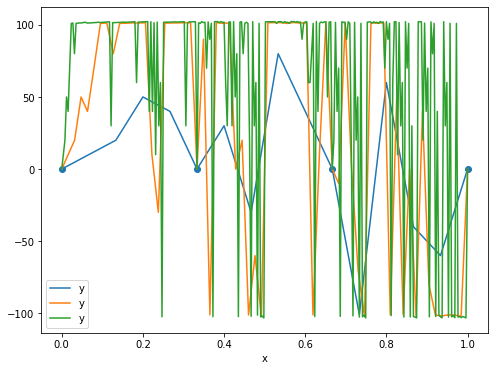

In [180]:
modulusChart([5,7,9])

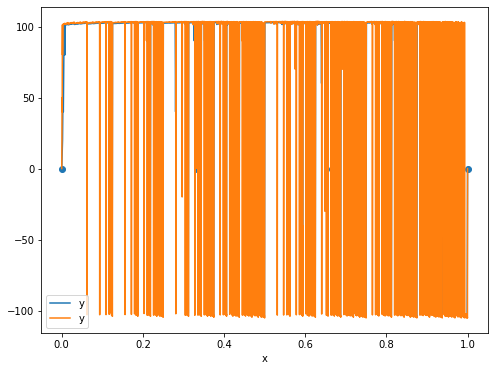

In [181]:
modulusChart([11,13])

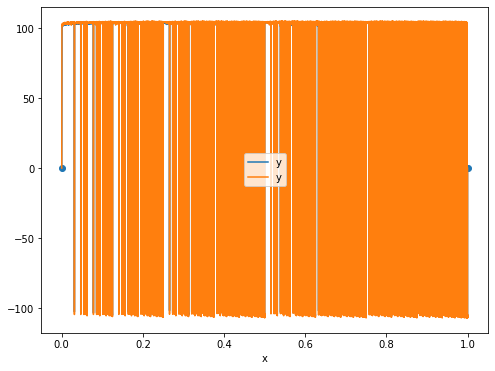

In [182]:
modulusChart([15,17])

# Lattice Label to Polynomial
The modulus plot does not appear to be immediately useful.  Things just get crazier and crazier as the rank increases.

Lets dig into what the bottom-to-top propagation matrices generate in terms of 2^n and 3^n and see if we can't come up with polynomials that can be derived from the labels themselves.

Also, the lattice naturally gives solutions 0, 1, 2, -1 at repeatable points in the lattice ... numerically -1, 0, 1, 2 makes more sense ... we should be able to find a transform that gives us that sequence and a generator for it.

In [183]:
xs_3, ms_3 = compute_generation(3)

In [184]:
xs_3

[array([ 0, -1,  4, -1]),
 array([ 1., -3.,  4., -3.]),
 array([ 2., -3.,  4., -3.]),
 array([ 5., -9.,  4., -9.])]

In [185]:
ms_3

[array([[ 1.,  0.,  0., -1.],
        [ 0.,  3.,  0.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  3.]]),
 array([[ 1.,  0.,  0., -2.],
        [ 0.,  3.,  0.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  3.]]),
 array([[ 1.,  0.,  0., -5.],
        [ 0.,  9.,  0.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  9.]])]

In [186]:
x10 = np.inner(m4_dn_rev, xs_3[0])
x10

array([ 0.,  1., -2.,  1.])

In [187]:
x1 = np.inner(m4_dn_rev, x10)
x1

array([ 0., -1.,  1., -1.])

In [188]:
m4_dn, m4_up

(array([[-2,  0,  0,  0],
        [ 0, -1,  0,  0],
        [ 0,  0, -2,  0],
        [ 0,  0,  0, -1]]),
 array([[-2,  0,  0,  1],
        [ 0, -3,  0,  0],
        [ 0,  0, -2,  0],
        [ 0,  0,  0, -3]]))

In [189]:
showInner(m4_dn, m4_dn.T)

[['(-2 * -2)', '0', '0', '0'],
 ['0', '(-1 * -1)', '0', '0'],
 ['0', '0', '(-2 * -2)', '0'],
 ['0', '0', '0', '(-1 * -1)']]

$x100: x\_dn * x\_dn * x1$

$x100\ numerator:  0 \cdot (-2)^{3-1}$

$x100\ denominator: -1 \cdot -1 \cdot -1  + -2 \cdot -2 \cdot 1 = (-1)^{3} + (-2)^{3-1} $

In [190]:
showInner(m4_dn, m4_up.T)

[['(-2 * -2)', '0', '0', '0'],
 ['0', '(-1 * -3)', '0', '0'],
 ['0', '0', '(-2 * -2)', '0'],
 ['0', '0', '0', '(-1 * -3)']]

$x101: x\_up * x\_dn * x1$

$x101\ numerator:  -2 \cdot -2 \cdot -1 \cdot \ +\  -3 \cdot -1  = (-2)^{3-1} + (-1)^{3-1} \cdot (2)^{3-2} $

$x101\ denominator:  -1 \cdot -3 \cdot -1 \cdot \ +\  -2 \cdot -2 \cdot 1 \cdot = (-1)^{3} \cdot (3)^{3-2} + (-2)^{3-1} $

$x110: x\_dn *x\_up *  x1$

$x110\ numerator:  -2 \cdot -2 \cdot -1 \cdot \ +\  -3 \cdot -1  = (-2)^{3-1} + (-1)^{3-1} \cdot (2)^{3-2} $


In [191]:
factors(131072)

{1,
 2,
 4,
 8,
 16,
 32,
 64,
 128,
 256,
 512,
 1024,
 2048,
 4096,
 8192,
 16384,
 32768,
 65536,
 131072}

In [192]:
5 * (2**19)

2621440

In [193]:
6 * (2**23)

50331648

In [194]:
2**27

134217728

In [195]:
for c in list(map(vars, casesNext(casesNext(casesNext(casesNext(casesNext([cycleCase__1(),cycleCase__0()]))))))):
    print("%s\t%d\t%d"%(c["label"],c["final"][0], c["final"][1]))

1111111	665	-665
1111110	422	-179
1111101	341	-179
1111100	260	-17
1111011	287	-179
1111010	206	-17
1111001	179	-17
1111000	152	37
1110111	251	-179
1110110	170	-17
1110101	143	-17
1110100	116	37
1110011	125	-17
1110010	98	37
1110001	89	37
1110000	80	55
1101111	227	-179
1101110	146	-17
1101101	119	-17
1101100	92	37
1101011	101	-17
1101010	74	37
1101001	65	37
1101000	56	55
1100111	89	-17
1100110	62	37
1100101	53	37
1100100	44	55
1100011	47	37
1100010	38	55
1100001	35	55
1100000	32	61
1011111	211	-179
1011110	130	-17
1011101	103	-17
1011100	76	37
1011011	85	-17
1011010	58	37
1011001	49	37
1011000	40	55
1010111	73	-17
1010110	46	37
1010101	37	37
1010100	28	55
1010011	31	37
1010010	22	55
1010001	19	55
1010000	16	61
1001111	65	-17
1001110	38	37
1001101	29	37
1001100	20	55
1001011	23	37
1001010	14	55
1001001	11	55
1001000	8	61
1000111	19	37
1000110	10	55
1000101	7	55
1000100	4	61
1000011	5	55
1000010	2	61
1000001	1	61
1000000	0	63


In [196]:
def getRotationSets(rank):
    rotations = {}
    sets = []
    N = 2**(rank-1)
    high_bit = 2**(rank-2)
    for i in range(N):
        if i not in rotations:
            r = i
            s = set([i])
            sets.append(s)
            rotations[i] = set([i])
            for j in range(rank-1):
                if r & 1 == 1:
                    r >>=1
                    r = r | high_bit
                else:
                    r >>=1
                if r not in rotations:
                    s.add(r)
                    rotations[r] = rotations[i]
                r = r
    #
    return sets
#

def setValToStr(rank, set_val):
    s = format(set_val, 'b')
    zs = "0"*(rank-len(s)-1)
    return "".join(["_", zs, s ])

def printRotationSet(rank):
    sets = getRotationSets(rank)
    for s in sets:
        A = [str(rank), str(len(s))]
        for val in s:
            A.append(setValToStr(rank, val))
        print('\t'.join(A))
    #
    return
    
def countRotationSets(to_rank):
    R = []
    for i in range(2, to_rank+1, 1):
        sets = getRotationSets(i)
        R.append([i, len(sets)])
    return R

In [197]:
# Where we find https://oeis.org/A000031
countRotationSets(20)

[[2, 2],
 [3, 3],
 [4, 4],
 [5, 6],
 [6, 8],
 [7, 14],
 [8, 20],
 [9, 36],
 [10, 60],
 [11, 108],
 [12, 188],
 [13, 352],
 [14, 632],
 [15, 1182],
 [16, 2192],
 [17, 4116],
 [18, 7712],
 [19, 14602],
 [20, 27596]]

In [198]:
for gen in range(4,16,2):
    printRotationSet(gen)

4	1	_000
4	3	_001	_010	_100
4	3	_011	_101	_110
4	1	_111
6	1	_00000
6	5	_00001	_00010	_00100	_01000	_10000
6	5	_00011	_00110	_01100	_10001	_11000
6	5	_00101	_01001	_01010	_10010	_10100
6	5	_00111	_01110	_10011	_11001	_11100
6	5	_01011	_01101	_10101	_10110	_11010
6	5	_01111	_10111	_11011	_11101	_11110
6	1	_11111
8	1	_0000000
8	7	_1000000	_0000001	_0100000	_0000010	_0000100	_0001000	_0010000
8	7	_1100000	_1000001	_0000011	_0000110	_0001100	_0110000	_0011000
8	7	_0100001	_1000010	_0000101	_0101000	_0001010	_1010000	_0010100
8	7	_1100001	_1000011	_0000111	_0001110	_1110000	_0111000	_0011100
8	7	_0100010	_1000100	_0100100	_1001000	_0001001	_0010001	_0010010
8	7	_1100010	_1000101	_0001011	_0101100	_0110001	_0010110	_1011000
8	7	_0100011	_1000110	_1101000	_0001101	_1010001	_0110100	_0011010
8	7	_1100011	_1000111	_0001111	_1110001	_1111000	_0111100	_0011110
8	7	_1100100	_0100110	_1001001	_1001100	_0110010	_0010011	_0011001
8	7	_0100101	_0101001	_1001010	_0101010	_1010010	_1010100	_0010101
8	7	_

14	13	_1101100100100	_1001101100100	_1100100100110	_1011001001001	_0011011001001	_1001001101100	_1001001001101	_0110110010010	_0110010010011	_0100110110010	_0100100110110	_0010011011001	_0010010011011
14	13	_1110100100100	_1001110100100	_0100100100111	_1101001001001	_0011101001001	_0010011101001	_1001001001110	_0111010010010	_1010010010011	_0100111010010	_1001001110100	_0100100111010	_0010010011101
14	13	_1111100100100	_1001111100100	_1100100100111	_1111001001001	_0011111001001	_1001001001111	_0111110010010	_1110010010011	_0100111110010	_0010011111001	_1001001111100	_0100100111110	_0010010011111
14	13	_1010010100100	_0010010100101	_0010100100101	_0100100101001	_0101001001010	_0100101001001	_0010100101001	_0100101001010	_1001001010010	_1001010010010	_1010010010100	_0101001010010	_1001010010100
14	13	_1010011100100	_0011100100101	_0010010100111	_1100100101001	_0111001001010	_0100111001001	_0100101001110	_1001110010010	_1001001010011	_1110010010100	_0101001110010	_0010100111001	_100101001

In [199]:
for gen in range(3,15,2):
    printRotationSet(gen)

3	1	_00
3	2	_01	_10
3	1	_11
5	1	_0000
5	4	_1000	_0001	_0010	_0100
5	4	_1001	_0011	_1100	_0110
5	2	_1010	_0101
5	4	_1011	_1101	_1110	_0111
5	1	_1111
7	1	_000000
7	6	_100000	_000001	_000010	_000100	_001000	_010000
7	6	_100001	_000011	_000110	_001100	_110000	_011000
7	6	_100010	_000101	_101000	_001010	_010001	_010100
7	6	_100011	_000111	_001110	_110001	_111000	_011100
7	3	_001001	_010010	_100100
7	6	_100101	_001011	_101100	_110010	_010110	_011001
7	6	_100110	_101001	_001101	_010011	_110100	_011010
7	6	_100111	_001111	_110011	_111001	_111100	_011110
7	2	_101010	_010101
7	6	_101011	_101110	_110101	_010111	_111010	_011101
7	3	_011011	_101101	_110110
7	6	_101111	_110111	_111011	_111101	_111110	_011111
7	1	_111111
9	1	_00000000
9	8	_10000000	_00000001	_00100000	_01000000	_00000100	_00000010	_00001000	_00010000
9	8	_11000000	_10000001	_01100000	_00000011	_00000110	_00001100	_00110000	_00011000
9	8	_10100000	_01000001	_10000010	_00000101	_00101000	_00001010	_01010000	_00010100
9	8	_11100000	_110

# Switching first character of label to "_" 

The one is too confusing.

☐ TODO: Change everything above

# A little closer look at the rank 4 set-of-three cycles


### Rank 4

$ set 1: _001 \ \ \  _010 \ \ \  _100 $

$ set 2: _011 \ \ \  _101 \ \ \  _110 $

### Rank 7

$ set 1: _001001 \ \ \  _010010 \ \ \  _100100 $

$ set 2: _011011 \ \ \  _101101 \ \ \  _110110 $

### Rank 10

$ set 1: _001001001 \ \ \  _010010010 \ \ \  _100100100 $

$ set 2: _011011011 \ \ \  _101101101 \ \ \  _110110110 $


In [278]:

def rotateLabelBits(label_bits):
    ''' Rotate  a string e.g. "001" -> "010"
    '''
    car = label_bits[0]
    cdr = label_bits[1:]
    return cdr + car
#

def getRotatedLabelSet(label_bits):
    ''' 
        Given one rotatable string, collect the whole set.  
        (We use set() to filter out the symmetric cases if any)
    '''
    n = len(label_bits)
    rotations = set([label_bits])
    for i in range(n):
        label_bits = rotateLabelBits(label_bits)
        rotations.add(label_bits)
        
    return rotations
#

def solveByLabel(label):
    ''' 
        Build the cycle matrix and Y vector that corresponds to the label bits and solve for X 
        Also returns size of set each solution is a member of
    '''
    rank = len(label)
    mat = np.zeros((rank,rank))
    y = np.zeros((rank))
    mat[rank-1][0] = 1
    mat[rank-1][rank-1] = -1
    for i in range(rank-1):
        mat[i][i+1] = 2
        if label[i+1:i+2] == "1":
            mat[i][i] = -3
            y[i] = 1
        else:
            mat[i][i] = -1
    x = np.linalg.solve(mat, y)
    det = np.linalg.det(mat)
    return (closest_int(x[-1]*det), closest_int(det)), ("set_size", len(getRotatedLabelSet(label[1:]))), x
    

            

In [279]:
solveByLabel("_001")

((-4, -5), ('set_size', 3), array([0.8, 0.4, 0.2, 0.8]))

In [280]:
solveByLabel("_0010")

((4, 13),
 ('set_size', 4),
 array([0.30769231, 0.15384615, 0.07692308, 0.61538462, 0.30769231]))

In [203]:
solveByLabel("_00100")

((-4, -29),
 ('set_size', 5),
 array([0.13793103, 0.06896552, 0.03448276, 0.55172414, 0.27586207,
        0.13793103]))

In [204]:
solveByLabel("_001001")

((44, 55), ('set_size', 3), array([0.8, 0.4, 0.2, 0.8, 0.4, 0.2, 0.8]))

In [205]:
solveByLabel("_001001001")

((-388, -485),
 ('set_size', 3),
 array([0.8, 0.4, 0.2, 0.8, 0.4, 0.2, 0.8, 0.4, 0.2, 0.8]))

In [206]:
solveByLabel("_110")

((-5, 1), ('set_size', 3), array([ -5.,  -7., -10.,  -5.]))

In [207]:
solveByLabel("_110110")

((85, -17), ('set_size', 3), array([ -5.,  -7., -10.,  -5.,  -7., -10.,  -5.]))

In [208]:
solveByLabel("_110110110")

((-1085, 217),
 ('set_size', 3),
 array([ -5.,  -7., -10.,  -5.,  -7., -10.,  -5.,  -7., -10.,  -5.]))

In [209]:
solveByLabel("_1110")

((19, -11),
 ('set_size', 4),
 array([-1.72727273, -2.09090909, -2.63636364, -3.45454545, -1.72727273]))

In [210]:
solveByLabel("_11110")

((-65, 49),
 ('set_size', 5),
 array([-1.32653061, -1.48979592, -1.73469388, -2.10204082, -2.65306122,
        -1.32653061]))

In [211]:
solveByLabel("_111110")

((211, -179),
 ('set_size', 6),
 array([-1.17877095, -1.26815642, -1.40223464, -1.60335196, -1.90502793,
        -2.3575419 , -1.17877095]))

In [212]:
solveByLabel("_1111100")

((-211, 115),
 ('set_size', 7),
 array([-1.83478261, -2.25217391, -2.87826087, -3.8173913 , -5.22608696,
        -7.33913043, -3.66956522, -1.83478261]))

In [213]:
solveByLabel("_11111000")

((211, 13),
 ('set_size', 8),
 array([ 16.23076923,  24.84615385,  37.76923077,  57.15384615,
         86.23076923, 129.84615385,  64.92307692,  32.46153846,
         16.23076923]))

In [214]:
solveByLabel("_1111110000")

((665, 295),
 ('set_size', 10),
 array([ 2.25423729,  3.88135593,  6.3220339 ,  9.98305085, 15.47457627,
        23.71186441, 36.06779661, 18.03389831,  9.01694915,  4.50847458,
         2.25423729]))

In [215]:
solveByLabel("_111111100000")

((2059, 1909),
 ('set_size', 12),
 array([ 1.07857517,  2.11786276,  3.67679413,  6.0151912 ,  9.5227868 ,
        14.7841802 , 22.6762703 , 34.51440545, 17.25720272,  8.62860136,
         4.31430068,  2.15715034,  1.07857517]))

In [216]:
solveByLabel("_11111111000000")

((6305, 9823),
 ('set_size', 14),
 array([ 0.64186094,  1.46279141,  2.69418711,  4.54128067,  7.311921  ,
        11.4678815 , 17.70182225, 27.05273338, 41.07910007, 20.53955004,
        10.26977502,  5.13488751,  2.56744375,  1.28372188,  0.64186094]))

# The \_0011 Set
This set has the same denominator in rank 5 as the 1,2,1,... set but has positions below the 1,2,1,.. solution, between the 1,2,1,... and 2,1,2,... solutions and above the 2,1,2,... solution.  It is a good example of how the tail-arrangement of 1's affects the numerator and prevents a solution from being an integer.

max(set) - min(set) = 15 which is less than 3*7 = 21.

 - max(set) comes from _0011
 - min(set) comes from _0110

$ \frac{d+13}{d} $

In [217]:
solveByLabel("_0011")

((20, 7),
 ('set_size', 4),
 array([2.85714286, 1.42857143, 0.71428571, 1.57142857, 2.85714286]))

$ \frac{d + 3}{d} $

In [218]:
solveByLabel("_0110")

((10, 7),
 ('set_size', 4),
 array([1.42857143, 0.71428571, 1.57142857, 2.85714286, 1.42857143]))

$ \frac{d - 2}{d} $

In [219]:
solveByLabel("_1100")

((5, 7),
 ('set_size', 4),
 array([0.71428571, 1.57142857, 2.85714286, 1.42857143, 0.71428571]))

$ \frac{d + 4}{d} $

In [220]:
solveByLabel("_1001")

((11, 7),
 ('set_size', 4),
 array([1.57142857, 2.85714286, 1.42857143, 0.71428571, 1.57142857]))

### Only in the first case is the added/subtracted constant > denominator ...
Remember ALL of these values would need to be integers in order to be a Collatz counter-example.

So if every set winds up with at least one situation where an addend to the numerator makes it impossible for the solution to be an integer, we would be done.

## The \_0110 and \_1001 numerators of the \_0011 set

Note that the numerators only vary by one above:

$ \frac{d + 3}{d} $ versus $ \frac{d + 4}{d} $

Can we turn this into a generalization for the _...10 versus _...01 set members of each set?  For instance show that the difference of the numerators of these 2 values is always $ < d$ ?